In [1]:
from astropy.io import fits
import numpy as np
import os
import matplotlib.pyplot as plt
from astropy.time import Time

In [2]:
import importlib
plots = importlib.import_module('plots')
importlib.reload(plots)
from plots import *

import importlib
utils = importlib.import_module('utils')
importlib.reload(utils)
from utils import *

In [3]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fs = 14

In [45]:
# ISGRI: 15 - 30 keV
cr1, vr1, sg1, xp1, acr1, avr1, cr1_cpsf, cr1_psf, err1_cpsf, err1_psf, date1, end1, offset1, exp1 = loadJupiterIMG(path='../data/Jupiter/15-30keV/Images', scw_path='../data/jupiter_table.dat', fitting=False)

# ISGRI: 30 - 60 keV
cr2, vr2, sg2, xp2, acr2, avr2, cr2_cpsf, cr2_psf, err2_cpsf, err2_psf, date2, end2, offset2, exp2 = loadJupiterIMG(path='../data/Jupiter/30-60keV/Images', scw_path='../data/jupiter_table.dat', fitting=False)

# ISGRI: 15 - 30 keV
cr3, vr3, sg3, xp3, acr3, avr3, cr3_cpsf, cr3_psf, err3_cpsf, err3_psf, date3, end3, offset3, exp3 = loadJupiterIMG(path='../data/Jupiter/3-15keV/Images', scw_path='../data/jupiter_table.dat', jemx = True, fitting=False)

Error processing file 059900370010.001mosaic.fits: list index out of range
Error processing file 026800190010.001mosaic.fits: list index out of range
Error processing file 026800250010.001mosaic.fits: list index out of range
Error processing file 027300140010.001mosaic.fits: list index out of range
Error processing file 027300090010.001mosaic.fits: list index out of range
Error processing file 027300100010.001mosaic.fits: list index out of range
Error processing file 060000450010.001mosaic.fits: list index out of range
Error processing file 059600530010.001mosaic.fits: list index out of range
Error processing file 059500130010.001mosaic.fits: list index out of range
Error processing file 059500510010.001mosaic.fits: list index out of range
Error processing file 026700380010.001mosaic.fits: list index out of range
Error processing file 060400120010.001mosaic.fits: list index out of range
Error processing file 027200380010.001mosaic.fits: list index out of range
Error processing file 059

In [11]:
# ISGRI: 60 - 100 keV
cr4, vr4, sg4, xp4, acr4, avr4, cr4_cpsf, cr4_psf, err4_cpsf, err4_psf, date4, end4, offset4, exp4 = loadJupiterIMG(path='../data/Jupiter/60-100keV/Images', scw_path='../data/jupiter_table.dat', jemx = True, fitting=False)

In [46]:
# Total durations for each energy band
dur1 = [end - start for end, start in zip(Time(end1).unix, Time(date1).unix)]
total_duration1 = np.sum(dur1)
print(f'Total duration for 15-30 keV: {total_duration1/1000:.0f} ks')
print(f'Number of scws for 15-30 keV: {len(date1)}')

dur2 = [end - start for end, start in zip(Time(end2).unix, Time(date2).unix)]
total_duration2 = np.sum(dur2)
print(f'Total duration for 30-60 keV: {total_duration2/1000:.0f} ks')
print(f'Number of scws for 30-60 keV: {len(date2)}')

dur3 = [end - start for end, start in zip(Time(end3).unix, Time(date3).unix)]
total_duration3 = np.sum(dur3)
print(f'Total duration for 3-15 keV: {total_duration3/1000:.0f} ks')
print(f'Number of scws for 3-15 keV: {len(date3)}')

Total duration for 15-30 keV: 1284 ks
Number of scws for 15-30 keV: 503
Total duration for 30-60 keV: 2315 ks
Number of scws for 30-60 keV: 915
Total duration for 3-15 keV: 297 ks
Number of scws for 3-15 keV: 114


In [5]:
dur4 = [end - start for end, start in zip(Time(end4).unix, Time(date4).unix)]
total_duration4 = np.sum(dur4)
print(f'Total duration for 60-100 keV: {total_duration4/1000:.0f} ks')
print(f'Number of scws for 60-100 keV: {len(date4)}')

Total duration for 60-100 keV: 1722 ks
Number of scws for 60-100 keV: 676


In [47]:
# Average duration
avg_duration1 = total_duration1 / len(date1)
avg_duration2 = total_duration2 / len(date2)
avg_duration3 = total_duration3 / len(date3)
print(f'Average duration for 15-30 keV: {avg_duration1/1000:.0f} ks')
print(f'Average duration for 30-60 keV: {avg_duration2/1000:.0f} ks')
print(f'Average duration for 3-15 keV: {avg_duration3/1000:.0f} ks')

Average duration for 15-30 keV: 3 ks
Average duration for 30-60 keV: 3 ks
Average duration for 3-15 keV: 3 ks


In [6]:
avg_duration4 = total_duration4 / len(date4)
print(f'Average duration for 60-100 keV: {avg_duration4/1000:.0f} ks')

Average duration for 60-100 keV: 3 ks


In [7]:
data = np.genfromtxt('../data/weighted_crab_averages.txt', delimiter='\t', skip_header=1, dtype=None, encoding=None)

crabENERGY = data['f0']  # Energy Band strings
crabYEAR = data['f1'].astype(int)
crabCR = data['f2'].astype(float)
crabERR = data['f3'].astype(float)

### Distribution of useful ScWs with time ranges from literature

Saved ScW distribution chart.


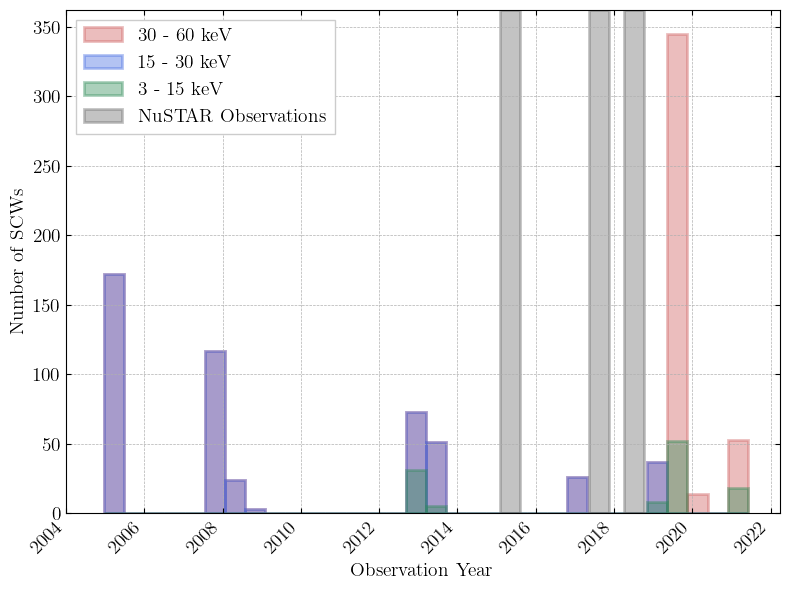

In [ ]:
plot_scw_distribution(date1, date2, date3, save=True)

In [110]:
import importlib
plots = importlib.import_module('plots')
importlib.reload(plots)
from plots import *

import importlib
utils = importlib.import_module('utils')
importlib.reload(utils)
from utils import *

Saved exposure distribution chart.


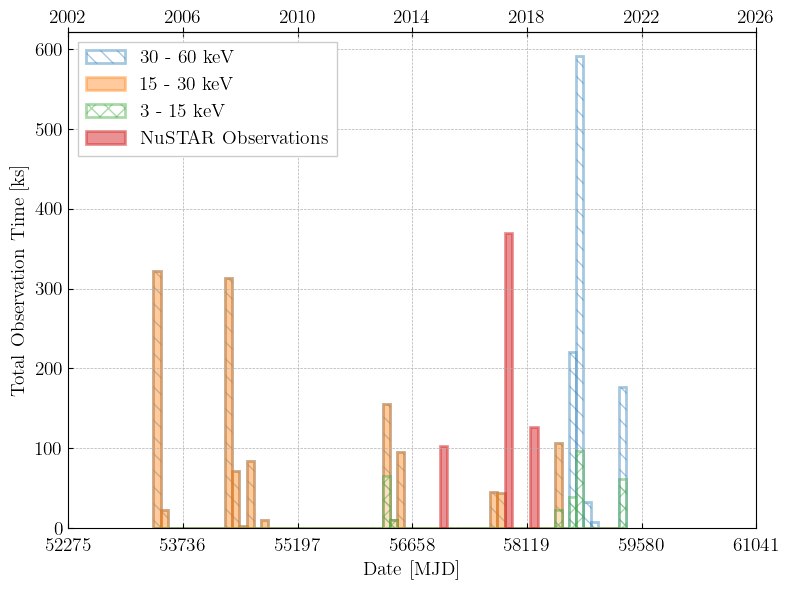

In [51]:
colors = plt.get_cmap('tab20').colors[::2]

plot_exposure_distribution((np.sort(date1), np.sort(end1)),(np.sort(date2), np.sort(end2)), (np.sort(date3), np.sort(end3)), bin_months=3, save=True, colors=colors)

### 15 - 30 keV

Light curves

In [52]:
img_times1 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S") for date in date1]
end_times1 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S") for date in end1]

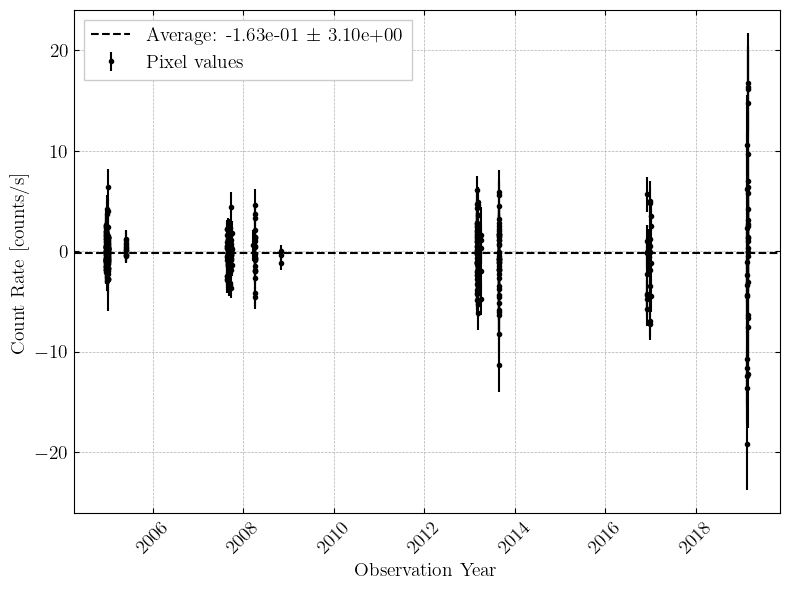

In [53]:
plot_countrate(img_times1, cr1, vr1)

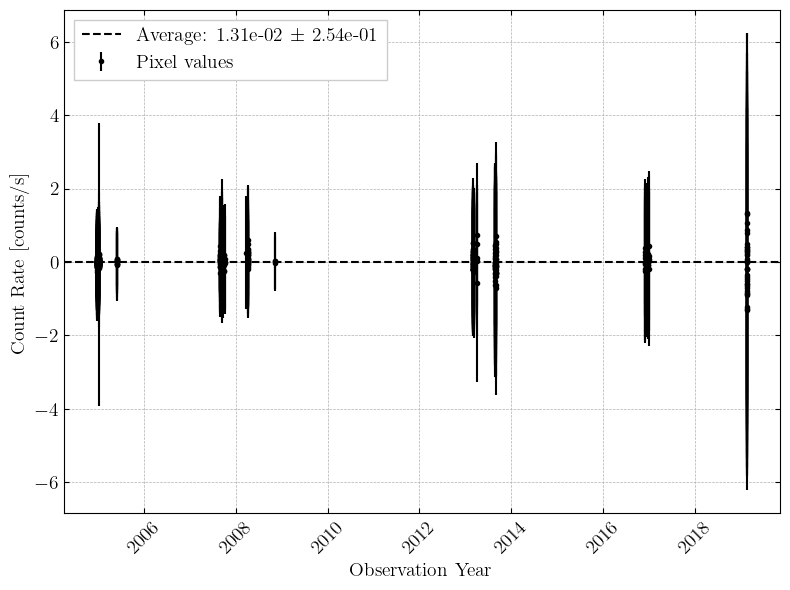

In [54]:
plot_countrate(img_times1, acr1, avr1)

Plot offset from pointing center

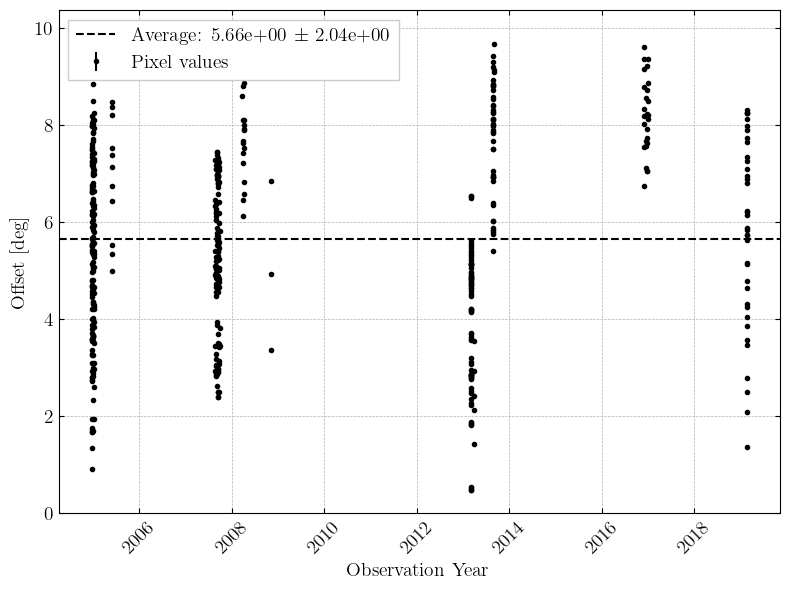

In [55]:
plot_offset(img_times1, offset1)

Signal to noise ratio

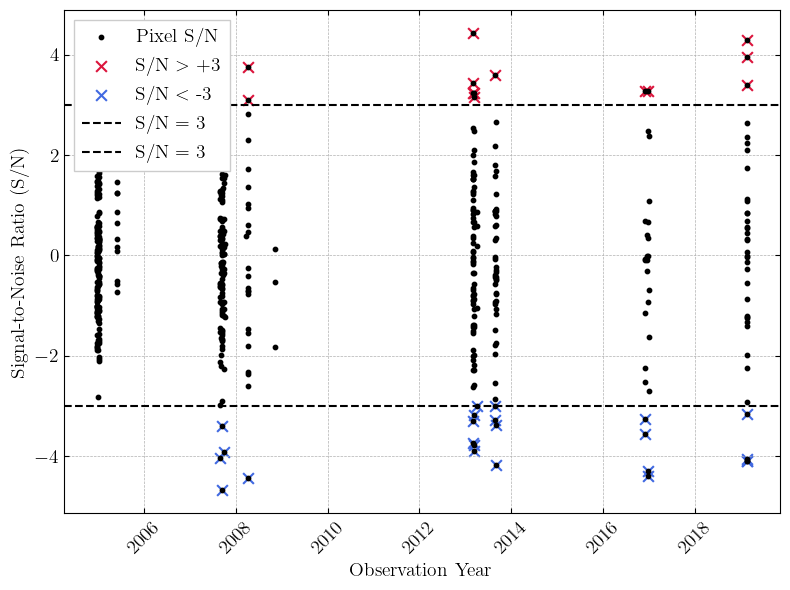

In [56]:
plot_snr(img_times1, cr1, vr1)

Normality p-value: 2.105e-01

Total observations: 503
Total points: 503
Observed points |S/N| > 3: 42
Expected points |S/N| > 3: 1.36
Observed fraction: 8.35%
Expected fraction: 0.27%
P-value (|S/N| > 3): 1.347e-47

Observed points S/N > 3: 21
Expected points S/N > 3: 0.68
Observed fraction (positive only): 4.17%
Expected fraction: 0.135%
P-value (S/N > 3): 1.972e-24


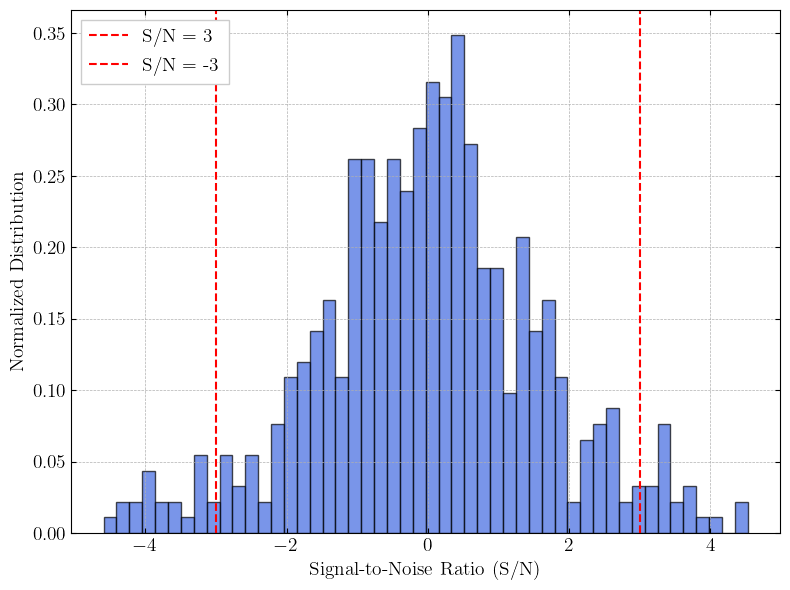

In [57]:
plot_snr_distribution(cr1, vr1, color='royalblue')

Fluxes

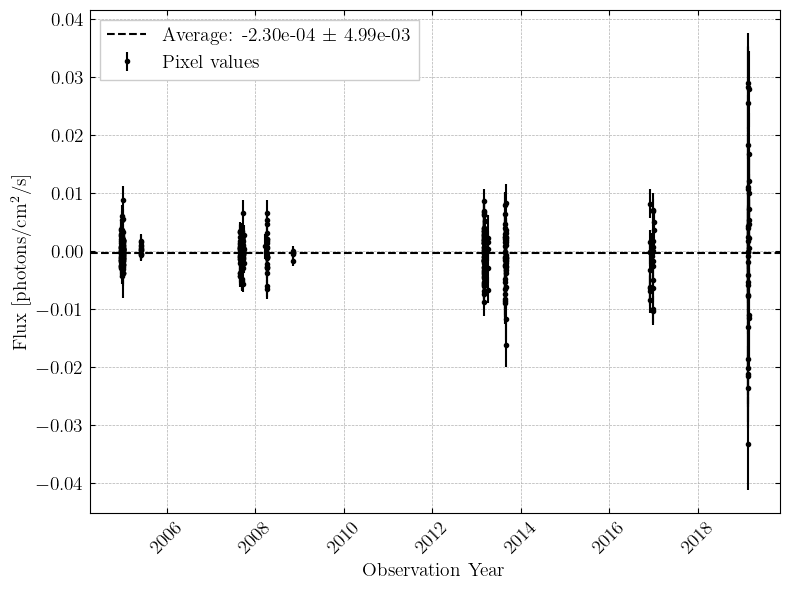

In [58]:
mask = crabENERGY == "15-30 keV"
crabYEAR_15_30 = crabYEAR[mask]
crabCR_15_30 = crabCR[mask]
crabERR_15_30 = crabERR[mask]

ph_flux1, ph_flux1_err, erg_flux1, erg_flux1_err, flux1_date, flux1_end = cr2flux(cr1, vr1, img_times1, end_times1, crabCR_15_30, crabERR_15_30, crabYEAR_15_30)

plot_flux(flux1_date, ph_flux1, ph_flux1_err**2)

In [59]:
ph_flux_weighted_avg, ph_flux_weighted_err = simple_weighted_average(ph_flux1, ph_flux1_err)
print(f"Weighted Photon Flux: {ph_flux_weighted_avg:.3e} ± {ph_flux_weighted_err:.3e}") 

Weighted Photon Flux: -1.010e-04 ± 7.031e-05


In [60]:
snr = cr1 / np.sqrt(vr1)
outliers_idx = [i for i, snr in enumerate(snr) if snr > 3]

print(f'Persistent upper limit: {ph_flux_weighted_err * 3 + ph_flux_weighted_avg:.3e}') # photons/cm2/s (3 * sigma weighted error + weighted average)
print(f'Average errorbar * 3: {ph_flux1_err.mean() * 3:.3e}') # photons/cm2/s (3 * sigma average error)
print(f'Max upper limit: {np.max([flux for i, flux in enumerate(ph_flux1) if i in outliers_idx]):.3e}') # photons/cm2/s (maximum flux value with S/N > 3)
print(f'Error on max upper limit: {np.max([flux for i, flux in enumerate(ph_flux1_err) if i in outliers_idx]):.3e}') # photons/cm2/s (error on maximum flux value with S/N > 3)

Persistent upper limit: 1.099e-04
Average errorbar * 3: 6.508e-03
Max upper limit: 2.910e-02
Error on max upper limit: 8.582e-03


In [61]:
cr1[outliers_idx].mean() # upper limit countrate sporadic (per scw)
cr1[outliers_idx].mean()/170 * 1e-8 # in terms of crab erg flux

3.8529405017304264e-10

In [62]:
gamma = 2.13  # photon index of ISGRI 
E0 = 100  # 100 keV reference energy
K = 6.2e-4  # flux (photons/cm2/s) @ 100 keV 

energy_range = (15, 30)  # keV

E = np.linspace(energy_range[0], energy_range[1], 1000) 

power_law = K * (E / E0) ** (-gamma)  # flux
flux1 = K / (E0**(-gamma)) * 1 / (1-gamma) * (energy_range[1]**(1-gamma) - energy_range[0]**(1-gamma))  # analytical
print(flux1)

0.25421276313368646


In [63]:
# print conversion factors over the years

print("Conversion factors for 15-30 keV ISGRI flux to photons/cm2/s:")

conv_factor = flux1 / crabCR_15_30
conv_factor_err = conv_factor * crabERR_15_30 / crabCR_15_30

for year in np.unique(crabYEAR_15_30):
    idx = np.where(crabYEAR_15_30 == year)[0]
    if len(idx) > 0:
        print(f"{year}: {conv_factor[idx[0]]:.3e} ± {conv_factor_err[idx[0]]:.3e} (photons/cm2/s) / (counts/s)")
    else:
        print(f"{year}: No data available")

Conversion factors for 15-30 keV ISGRI flux to photons/cm2/s:
2003: 1.573e-03 ± 5.461e-06 (photons/cm2/s) / (counts/s)
2004: 1.430e-03 ± 5.616e-06 (photons/cm2/s) / (counts/s)
2005: 1.368e-03 ± 4.423e-06 (photons/cm2/s) / (counts/s)
2006: 1.645e-03 ± 7.141e-06 (photons/cm2/s) / (counts/s)
2007: 1.516e-03 ± 6.226e-06 (photons/cm2/s) / (counts/s)
2008: 1.428e-03 ± 6.429e-06 (photons/cm2/s) / (counts/s)
2009: 1.494e-03 ± 7.013e-06 (photons/cm2/s) / (counts/s)
2010: 1.533e-03 ± 6.893e-06 (photons/cm2/s) / (counts/s)
2011: 1.571e-03 ± 8.846e-06 (photons/cm2/s) / (counts/s)
2012: 1.571e-03 ± 8.411e-06 (photons/cm2/s) / (counts/s)
2013: 1.421e-03 ± 6.180e-06 (photons/cm2/s) / (counts/s)
2014: 1.419e-03 ± 8.728e-06 (photons/cm2/s) / (counts/s)
2015: 1.498e-03 ± 6.950e-06 (photons/cm2/s) / (counts/s)
2016: 1.441e-03 ± 6.702e-06 (photons/cm2/s) / (counts/s)
2017: 1.462e-03 ± 9.313e-06 (photons/cm2/s) / (counts/s)
2018: 1.453e-03 ± 9.787e-06 (photons/cm2/s) / (counts/s)
2019: 1.732e-03 ± 2.946e-0

Monthly weighted average

In [64]:
import importlib
plots = importlib.import_module('plots')
importlib.reload(plots)
from plots import *

import importlib
utils = importlib.import_module('utils')
importlib.reload(utils)
from utils import *

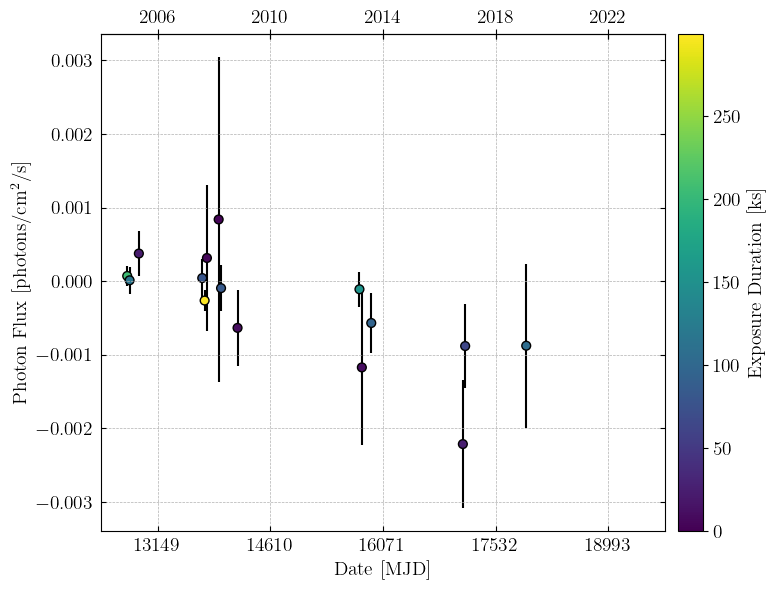

In [65]:
monthly_lightcurve1 = plot_monthly_flux_lc(ph_flux1, ph_flux1_err, erg_flux1, erg_flux1_err, flux1_date, flux1_end, plot=True, dual_plot='exposure', save=True, save_name='Jupiter-LC-15-30keV')

Comparison with background

Images corresponding to S/N > 3:
Date: 2019-02-23 15:51:50, S/N: 3.0572524514730124
File name: 215100690010.001mosaic.fits
Max value: 17.706110458837227
Index of max value: 352



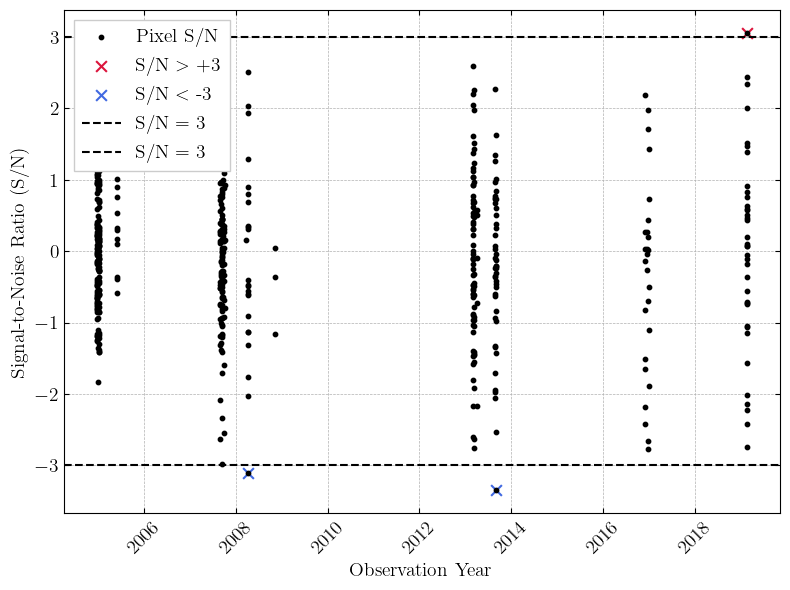

In [66]:
plot_bkgd_snr(img_times1, cr1, vr1, acr1, avr1)

In [81]:
import importlib
plots = importlib.import_module('plots')
importlib.reload(plots)
from plots import *

import importlib
utils = importlib.import_module('utils')
importlib.reload(utils)
from utils import *

Normality p-value: 1.382e-01

Total observations: 503
Total points: 503
Observed points |S/N| > 3: 3
Expected points |S/N| > 3: 1.36
Observed fraction: 0.60%
Expected fraction: 0.27%
P-value (|S/N| > 3): 1.074e-01

Observed points S/N > 3: 1
Expected points S/N > 3: 0.68
Observed fraction (positive only): 0.20%
Expected fraction: 0.135%
P-value (S/N > 3): 3.447e-01


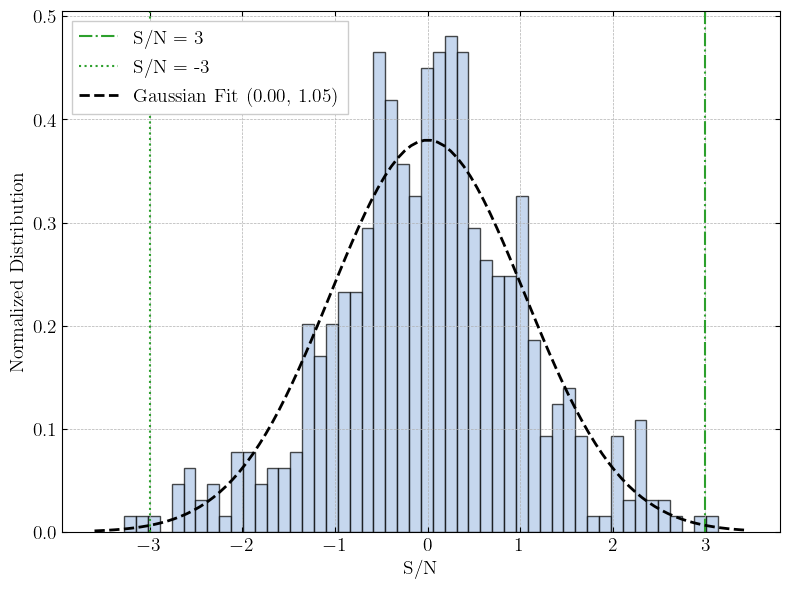

In [111]:
colors = plt.get_cmap('tab20').colors

plot_bkgd_snr_distribution(cr1, vr1, acr1, avr1, color=colors[1], linecolor=colors[4], fit=True, save=True, save_name='Jupiter-15-30-BSNR-distribution')

### 30 - 60 keV

Light curves

In [69]:
img_times2 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S") for date in date2]
end_times2 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S") for date in end2]

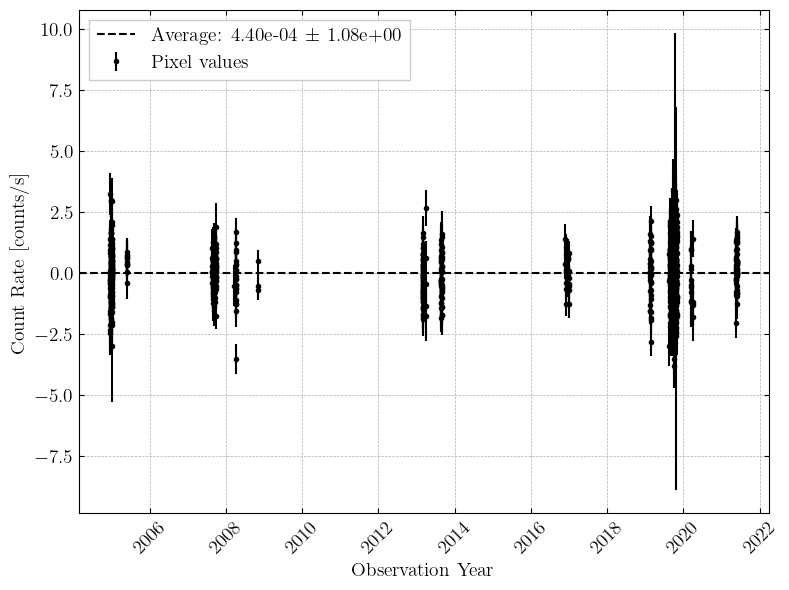

In [70]:
plot_countrate(img_times2, cr2, vr2)

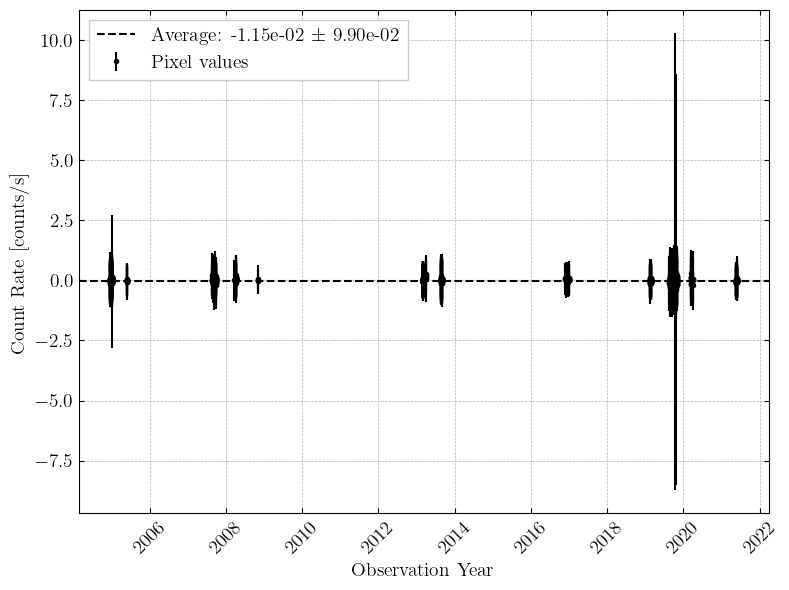

In [71]:
plot_countrate(img_times2, acr2, avr2)

Plot offset from pointing center

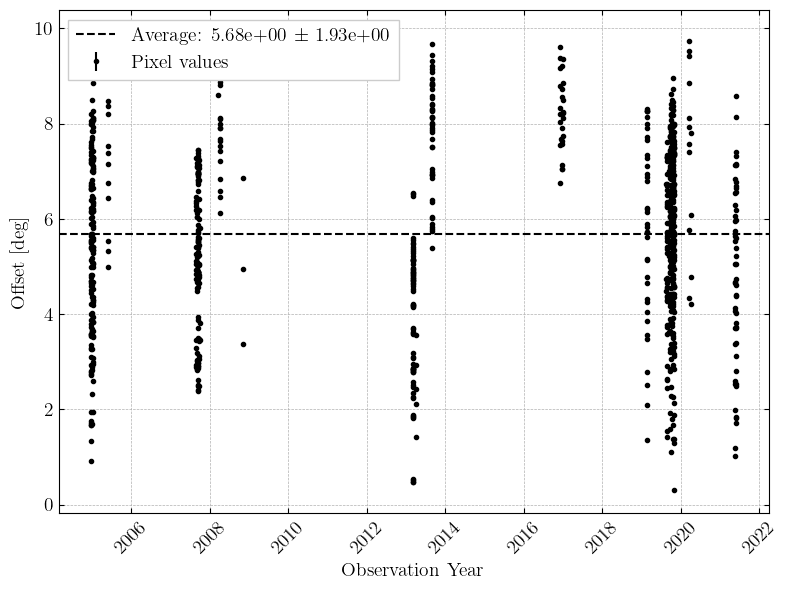

In [72]:
plot_offset(img_times2, offset2)

Signal to noise ratio

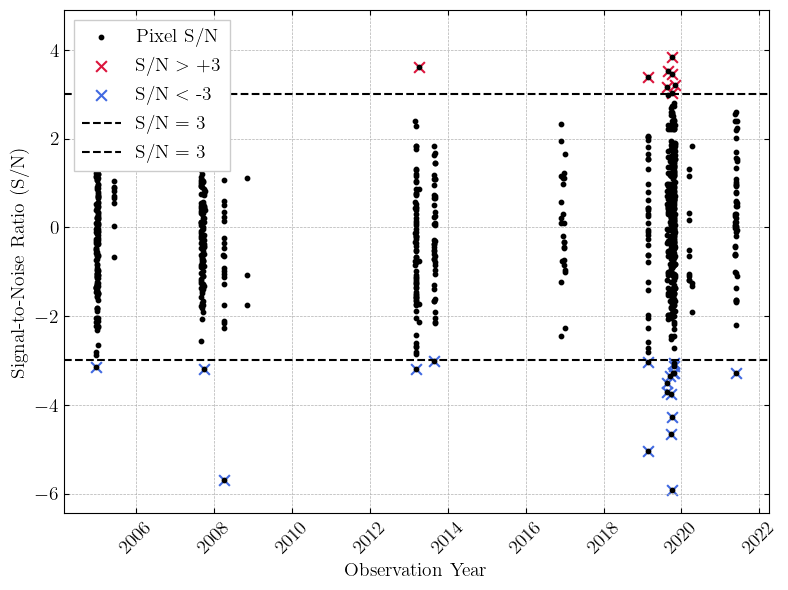

In [73]:
plot_snr(img_times2, cr2, vr2)

Normality p-value: 2.375e-03

Total observations: 915
Total points: 915
Observed points |S/N| > 3: 33
Expected points |S/N| > 3: 2.47
Observed fraction: 3.61%
Expected fraction: 0.27%
P-value (|S/N| > 3): 5.419e-26

Observed points S/N > 3: 15
Expected points S/N > 3: 1.24
Observed fraction (positive only): 1.64%
Expected fraction: 0.135%
P-value (S/N > 3): 4.805e-12


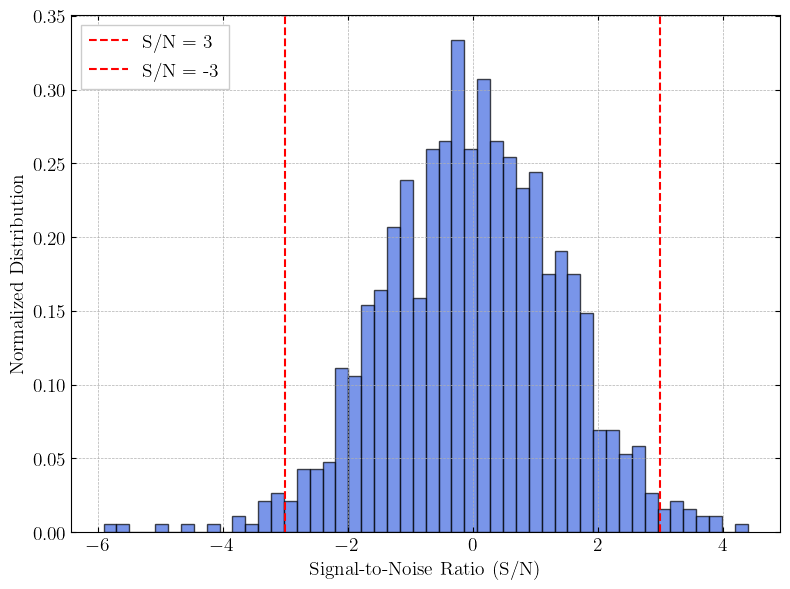

In [74]:
plot_snr_distribution(cr2, vr2, color='royalblue')

Fluxes

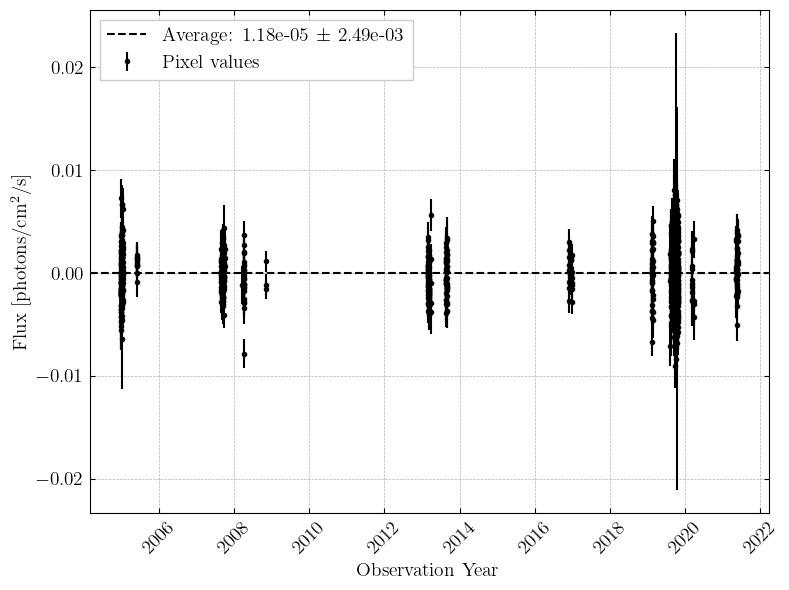

In [75]:
mask = crabENERGY == "30-60 keV"
crabYEAR_30_60 = crabYEAR[mask]
crabCR_30_60 = crabCR[mask]
crabERR_30_60 = crabERR[mask]

ph_flux2, ph_flux2_err, erg_flux2, erg_flux2_err, flux2_date, flux2_end = cr2flux(cr2, vr2, img_times2, end_times2, crabCR_30_60, crabERR_30_60, crabYEAR_30_60)

plot_flux(flux2_date, ph_flux2, ph_flux2_err**2)

In [76]:
ph_flux_weighted_avg, ph_flux_weighted_err = simple_weighted_average(ph_flux2, ph_flux2_err)
print(f"Weighted Photon Flux: {ph_flux_weighted_avg:.3e} ± {ph_flux_weighted_err:.3e}") 

Weighted Photon Flux: -7.314e-05 ± 5.289e-05


In [77]:
snr = cr2 / np.sqrt(vr2)
outliers_idx = [i for i, snr in enumerate(snr) if snr > 3]

print(f'Persistent upper limit: {ph_flux_weighted_err * 3 + ph_flux_weighted_avg:.3e}') # photons/cm2/s (3 * sigma weighted error + weighted average)
print(f'Average errorbar * 3: {ph_flux1_err.mean() * 3:.3e}') # photons/cm2/s (3 * sigma average error)
print(f'Max upper limit: {np.max([flux for i, flux in enumerate(ph_flux2) if i in outliers_idx]):.3e}') # photons/cm2/s (maximum flux value with S/N > 3)
print(f'Error on max upper limit: {np.max([flux for i, flux in enumerate(ph_flux2_err) if i in outliers_idx]):.3e}') # photons/cm2/s (error on maximum flux value with S/N > 3)

Persistent upper limit: 8.552e-05
Average errorbar * 3: 6.508e-03
Max upper limit: 7.593e-03
Error on max upper limit: 2.025e-03


In [78]:
cr2[outliers_idx].mean() # upper limit countrate sporadic (per scw)
cr2[outliers_idx].mean()/170 * 1e-8 # in terms of crab erg flux

1.47271224815921e-10

In [90]:
gamma = 2.13  # photon index of ISGRI 
E0 = 100  # 100 keV reference energy
K = 6.2e-4  # flux (photons/cm2/s) @ 100 keV 

energy_range = (30, 60)  # keV

E = np.linspace(energy_range[0], energy_range[1], 1000) 

power_law = K * (E / E0) ** (-gamma)  # flux
flux2 = np.trapz(power_law, E)  # integrate over the energy range
print(flux2)

0.11615384707507256


In [91]:
# print conversion factors over the years

print("Conversion factors for 30-60 keV ISGRI flux to photons/cm2/s:")

conv_factor = flux2 / crabCR_30_60
conv_factor_err =  conv_factor * (crabERR_30_60 / crabCR_30_60)

for year in np.unique(crabYEAR_30_60):
    idx = np.where(crabYEAR_30_60 == year)[0]
    if len(idx) > 0:
        print(f"{year}: {conv_factor[idx[0]]:.3e} ± {conv_factor_err[idx[0]]:.3e} (photons/cm2/s) / (counts/s)")
    else:
        print(f"{year}: No data available")

Conversion factors for 30-60 keV ISGRI flux to photons/cm2/s:
2003: 1.049e-03 ± 3.848e-06 (photons/cm2/s) / (counts/s)
2004: 1.021e-03 ± 4.441e-06 (photons/cm2/s) / (counts/s)
2005: 9.679e-04 ± 3.559e-06 (photons/cm2/s) / (counts/s)
2006: 1.112e-03 ± 5.574e-06 (photons/cm2/s) / (counts/s)
2007: 1.053e-03 ± 4.755e-06 (photons/cm2/s) / (counts/s)
2008: 1.017e-03 ± 4.636e-06 (photons/cm2/s) / (counts/s)
2009: 1.071e-03 ± 5.360e-06 (photons/cm2/s) / (counts/s)
2010: 1.065e-03 ± 4.100e-06 (photons/cm2/s) / (counts/s)
2011: 1.052e-03 ± 4.302e-06 (photons/cm2/s) / (counts/s)
2012: 1.039e-03 ± 4.035e-06 (photons/cm2/s) / (counts/s)
2013: 9.754e-04 ± 2.718e-06 (photons/cm2/s) / (counts/s)
2014: 9.710e-04 ± 3.227e-06 (photons/cm2/s) / (counts/s)
2015: 9.805e-04 ± 2.391e-06 (photons/cm2/s) / (counts/s)
2016: 9.868e-04 ± 2.533e-06 (photons/cm2/s) / (counts/s)
2017: 9.538e-04 ± 2.710e-06 (photons/cm2/s) / (counts/s)
2018: 9.704e-04 ± 2.814e-06 (photons/cm2/s) / (counts/s)
2019: 1.083e-03 ± 3.510e-0

Monthly weighted average

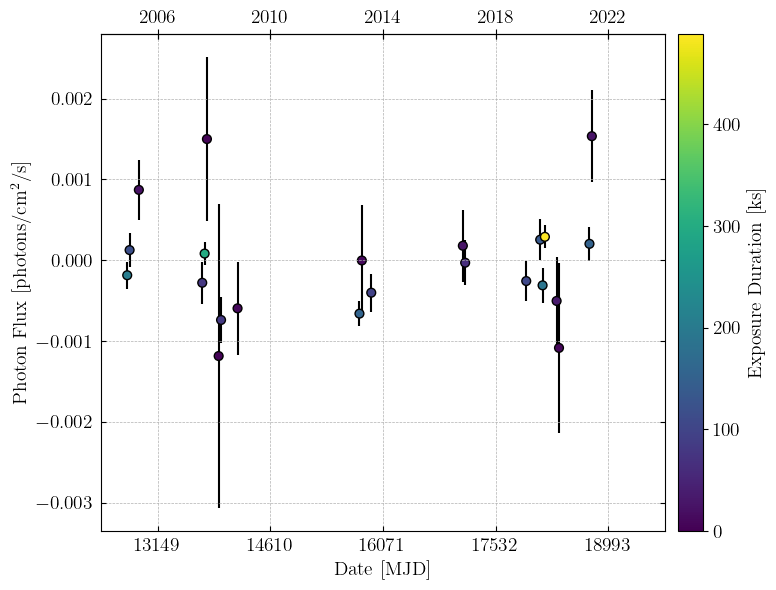

In [92]:
monthly_lightcurve2 = plot_monthly_flux_lc(ph_flux2, ph_flux2_err, erg_flux2, erg_flux2_err, flux2_date, flux2_end, plot=True, dual_plot='exposure', save=True, save_name='Jupiter-LC-30-60keV')

Comparison with background

Images corresponding to S/N > 3:


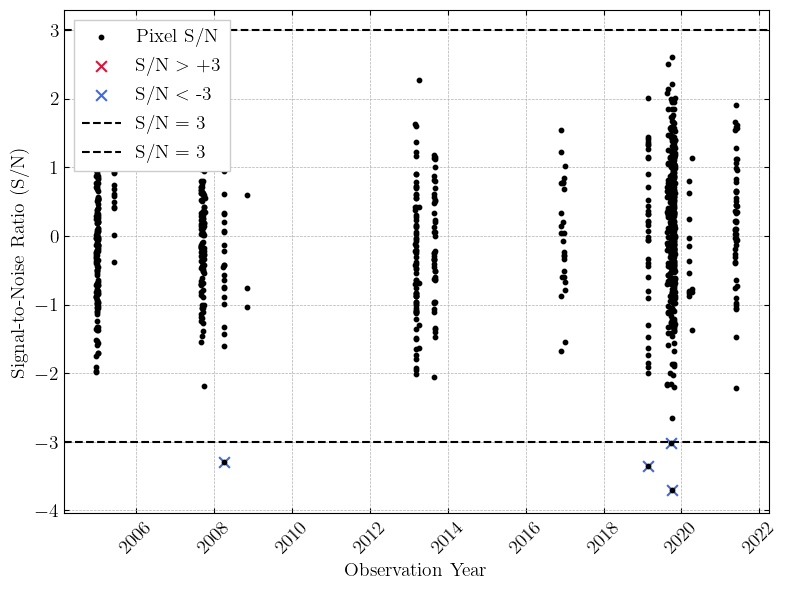

In [93]:
plot_bkgd_snr(img_times2, cr2, vr2, acr2, avr2)

Normality p-value: 1.778e-01

Total observations: 915
Total points: 915
Observed points |S/N| > 3: 4
Expected points |S/N| > 3: 2.47
Observed fraction: 0.44%
Expected fraction: 0.27%
P-value (|S/N| > 3): 1.313e-01

Observed points S/N > 3: 0
Expected points S/N > 3: 1.24
Observed fraction (positive only): 0.00%
Expected fraction: 0.135%
P-value (S/N > 3): 2.905e-01


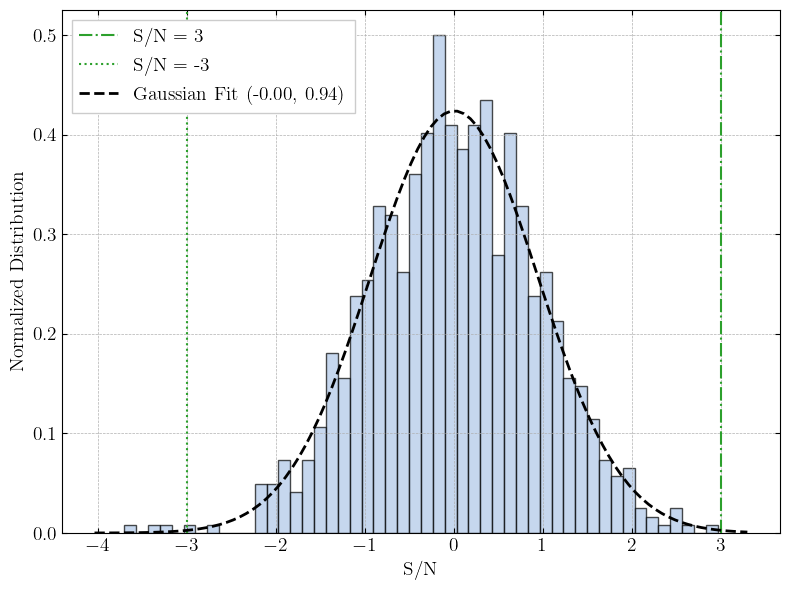

In [112]:
plot_bkgd_snr_distribution(cr2, vr2, acr2, avr2, color=colors[1], linecolor=colors[4], fit=True, save=True, save_name='Jupiter-30-60-BSNR-distribution')

### 3 - 15 keV

Light curves

In [96]:
img_times3 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.%f") for date in date3]
end_times3 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.%f") for date in end3]

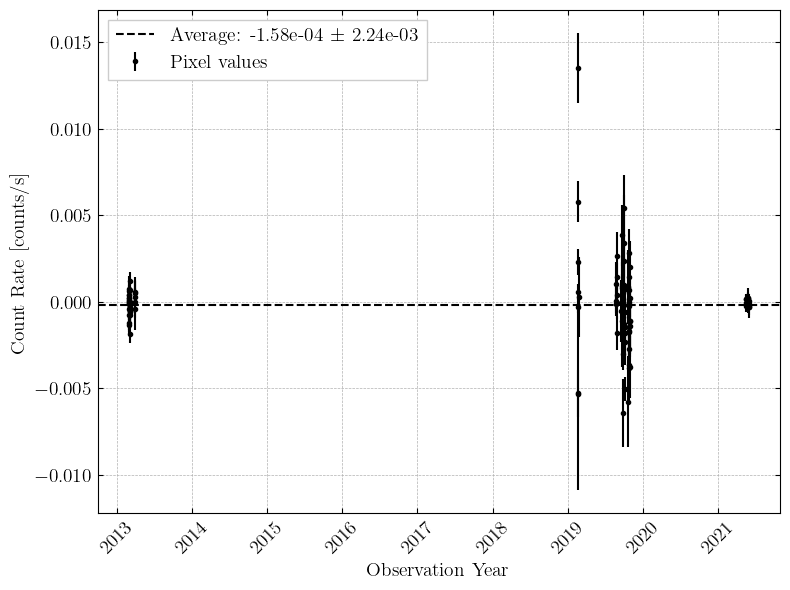

In [97]:
plot_countrate(img_times3, cr3, vr3)

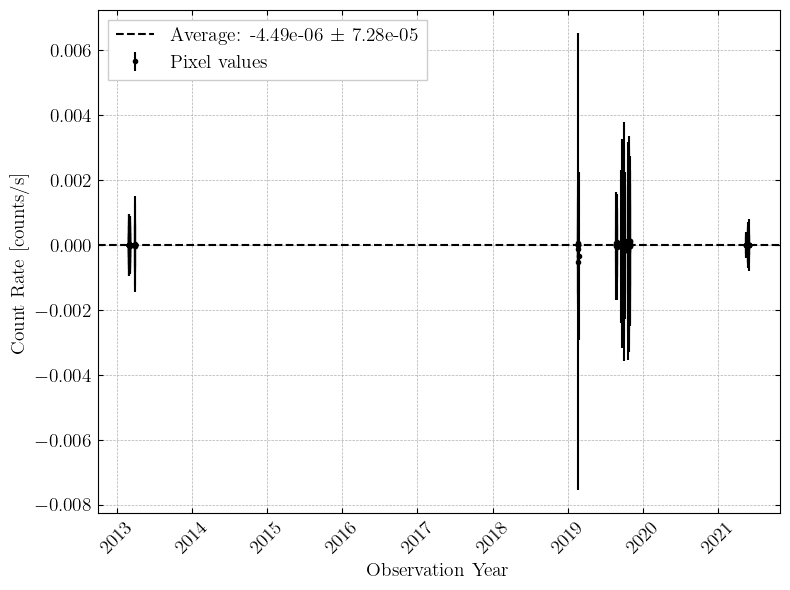

In [98]:
plot_countrate(img_times3, acr3, avr3)

Plot offset from pointing center

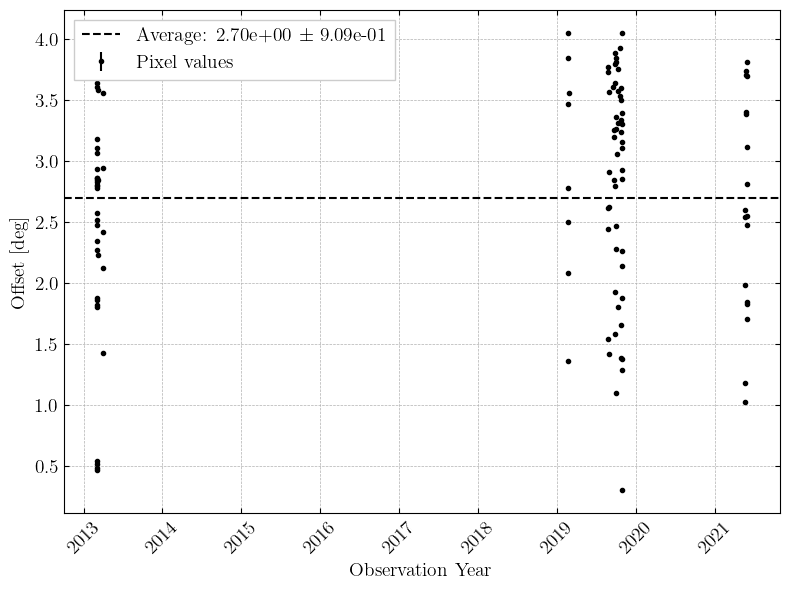

In [99]:
plot_offset(img_times3, offset3)

Signal to noise ratio

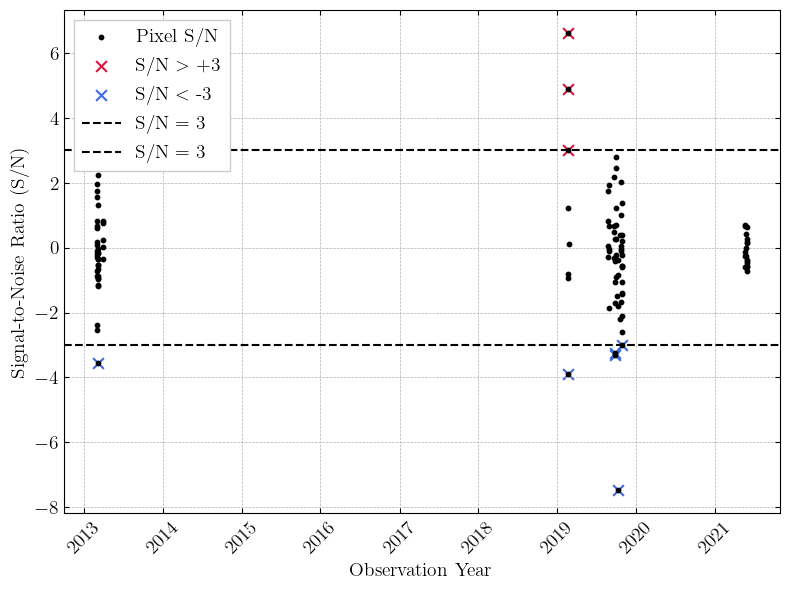

In [100]:
plot_snr(img_times3, cr3, vr3)

Normality p-value: 3.539e-05

Total observations: 114
Total points: 114
Observed points |S/N| > 3: 8
Expected points |S/N| > 3: 0.31
Observed fraction: 7.02%
Expected fraction: 0.27%
P-value (|S/N| > 3): 1.167e-09

Observed points S/N > 3: 3
Expected points S/N > 3: 0.15
Observed fraction (positive only): 2.63%
Expected fraction: 0.135%
P-value (S/N > 3): 5.092e-04


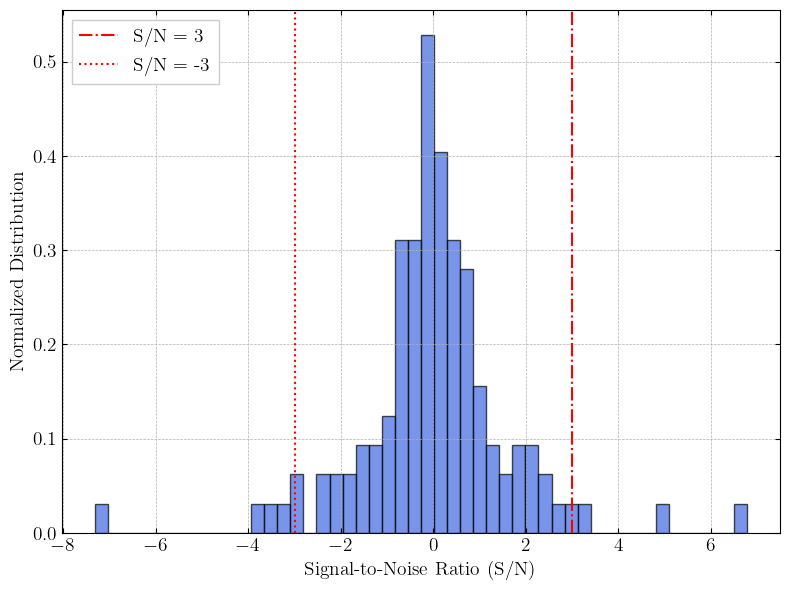

In [101]:
plot_snr_distribution(cr3, vr3, color='royalblue')

Fluxes

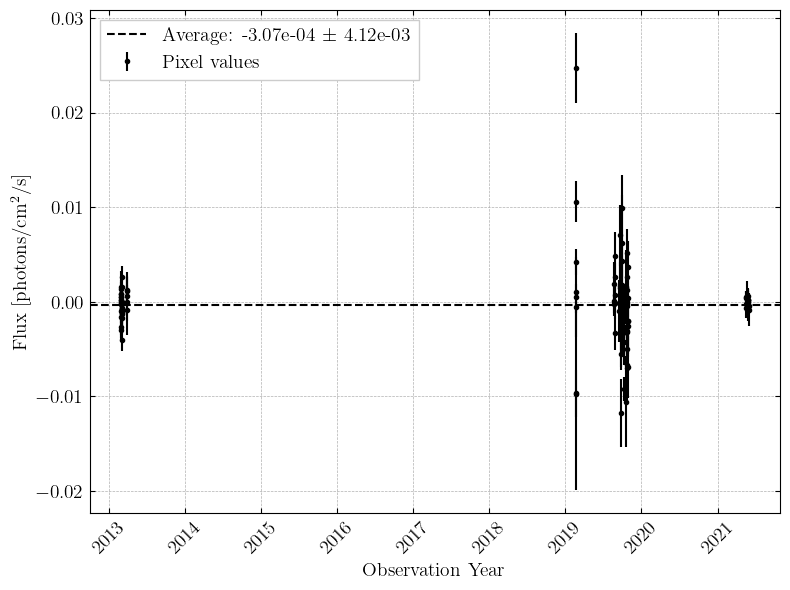

In [102]:
mask = crabENERGY == "3-15 keV"
crabYEAR_3_15 = crabYEAR[mask]
crabCR_3_15 = crabCR[mask]
crabERR_3_15 = crabERR[mask]

ph_flux3, ph_flux3_err, erg_flux3, erg_flux3_err, flux3_date, flux3_end = cr2flux(cr3, vr3, img_times3, end_times3, crabCR_3_15, crabERR_3_15, crabYEAR_3_15)

plot_flux(flux3_date, ph_flux3, ph_flux3_err**2)

In [103]:
ph_flux_weighted_avg, ph_flux_weighted_err = simple_weighted_average(ph_flux3, ph_flux3_err)
print(f"Weighted Photon Flux: {ph_flux_weighted_avg:.3e} ± {ph_flux_weighted_err:.3e}") 

Weighted Photon Flux: -1.169e-04 ± 1.088e-04


In [104]:
snr = cr3 / np.sqrt(vr3)
outliers_idx = [i for i, snr in enumerate(snr) if snr > 3]

print(f'Persistent upper limit: {ph_flux_weighted_err * 3 + ph_flux_weighted_avg:.3e}') # photons/cm2/s (3 * sigma weighted error + weighted average)
print(f'Average errorbar * 3: {ph_flux1_err.mean() * 3:.3e}') # photons/cm2/s (3 * sigma average error)
print(f'Max upper limit: {np.max([flux for i, flux in enumerate(ph_flux3) if i in outliers_idx]):.3e}') # photons/cm2/s (maximum flux value with S/N > 3)
print(f'Error on max upper limit: {np.max([flux for i, flux in enumerate(ph_flux3_err) if i in outliers_idx]):.3e}') # photons/cm2/s (error on maximum flux value with S/N > 3)

Persistent upper limit: 2.094e-04
Average errorbar * 3: 6.508e-03
Max upper limit: 2.472e-02
Error on max upper limit: 3.730e-03


In [105]:
gamma = 2.08  # photon index of ISGRI 
E0 = 1  # 100 keV reference energy
K = 10.3  # flux (photons/cm2/s/keV) @ 1 keV

energy_range = (3, 15)  # keV

E = np.linspace(energy_range[0], energy_range[1], 1000) 

power_law = K * (E / E0) ** (-gamma)  # flux
flux3 = np.trapz(power_law, E)  # integrate over the energy range
print(flux3)

2.3995883428668927


In [106]:
# print conversion factors over the years

print("Conversion factors for 3-15 keV ISGRI flux to photons/cm2/s:")

conv_factor = flux3 / crabCR_3_15
conv_factor_err = conv_factor * (crabERR_3_15 / crabCR_3_15)

for year in np.unique(crabYEAR_3_15):
    idx = np.where(crabYEAR_3_15 == year)[0]
    if len(idx) > 0:
        print(f"{year}: {conv_factor[idx[0]]:.3e} ± {conv_factor_err[idx[0]]:.3e} (photons/cm2/s) / (counts/s)")
    else:
        print(f"{year}: No data available")

Conversion factors for 3-15 keV ISGRI flux to photons/cm2/s:
2003: 1.873e+01 ± 3.802e-01 (photons/cm2/s) / (counts/s)
2004: 2.270e+01 ± 2.148e-01 (photons/cm2/s) / (counts/s)
2006: 2.148e+01 ± 2.693e-01 (photons/cm2/s) / (counts/s)
2008: 2.369e+01 ± 3.274e-01 (photons/cm2/s) / (counts/s)
2009: 1.959e+01 ± 3.678e-01 (photons/cm2/s) / (counts/s)
2010: 2.201e+01 ± 2.222e-01 (photons/cm2/s) / (counts/s)
2011: 2.362e+01 ± 5.812e-01 (photons/cm2/s) / (counts/s)
2012: 1.764e+01 ± 1.038e-01 (photons/cm2/s) / (counts/s)
2013: 2.056e+01 ± 1.586e-01 (photons/cm2/s) / (counts/s)
2014: 2.042e+01 ± 1.390e-01 (photons/cm2/s) / (counts/s)
2015: 1.854e+01 ± 8.598e-02 (photons/cm2/s) / (counts/s)
2016: 1.938e+01 ± 1.253e-01 (photons/cm2/s) / (counts/s)
2017: 2.094e+01 ± 1.644e-01 (photons/cm2/s) / (counts/s)
2018: 1.761e+01 ± 1.162e-01 (photons/cm2/s) / (counts/s)
2019: 1.728e+01 ± 8.706e-02 (photons/cm2/s) / (counts/s)
2020: 2.177e+01 ± 1.383e-01 (photons/cm2/s) / (counts/s)
2021: 2.597e+01 ± 2.248e-01

Monthly weighted average

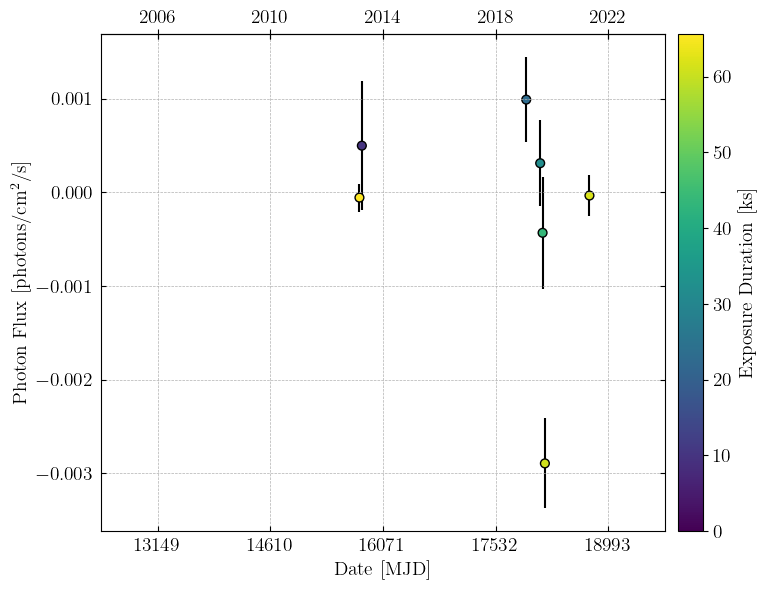

In [107]:
monthly_lightcurve3 = plot_monthly_flux_lc(ph_flux3, ph_flux3_err, erg_flux3, erg_flux3_err, flux3_date, flux3_end, plot=True, dual_plot='exposure', save=True, save_name='Jupiter-LC-3-15keV')

Comparison with background

Images corresponding to S/N > 3:
Date: 2019-02-20 06:43:12.403000, S/N: 4.904039659398651
File name: 220500170010.001mosaic.fits
Max value: 0.013488407971057112
Index of max value: 43

Date: 2019-02-19 21:34:59.381000, S/N: 3.217938309334908
File name: 214500330010.001mosaic.fits
Max value: 0.013488407971057112
Index of max value: 44



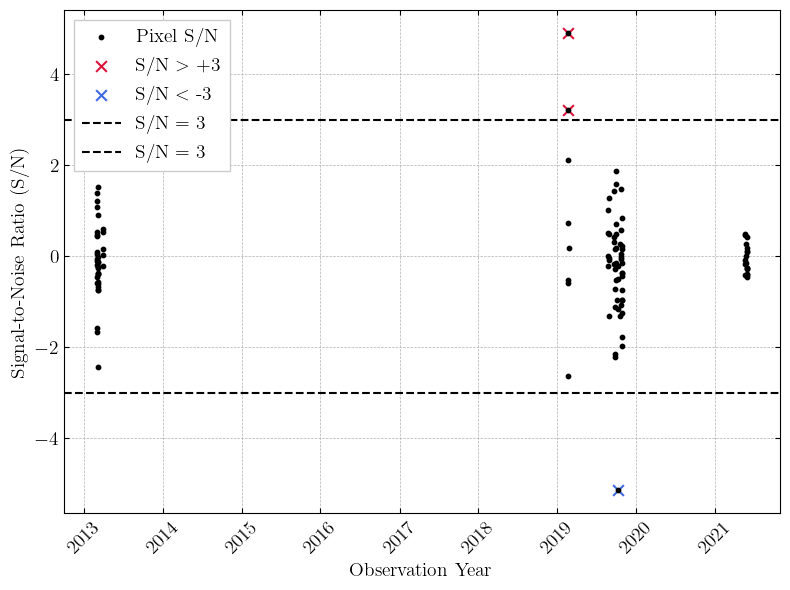

In [108]:
plot_bkgd_snr(img_times3, cr3, vr3, acr3, avr3)

Normality p-value: 8.456e-06

Total observations: 114
Total points: 114
Observed points |S/N| > 3: 3
Expected points |S/N| > 3: 0.31
Observed fraction: 2.63%
Expected fraction: 0.27%
P-value (|S/N| > 3): 3.506e-03

Observed points S/N > 3: 2
Expected points S/N > 3: 0.15
Observed fraction (positive only): 1.75%
Expected fraction: 0.135%
P-value (S/N > 3): 1.009e-02


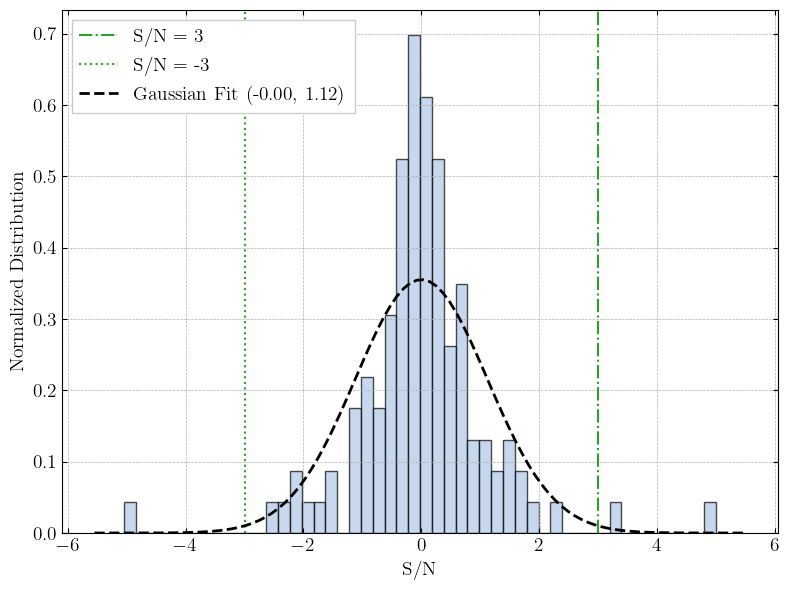

In [113]:
plot_bkgd_snr_distribution(cr3, vr3, acr3, avr3, color=colors[1], linecolor=colors[4], fit=True, save=True, save_name='Jupiter-3-15-BSNR-distribution')

### 60 - 100 keV

Light curves

In [9]:
img_times4 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.%f") for date in date4]
end_times4 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.%f") for date in end4]

In [14]:
import importlib
plots = importlib.import_module('plots')
importlib.reload(plots)
from plots import *

import importlib
utils = importlib.import_module('utils')
importlib.reload(utils)
from utils import *

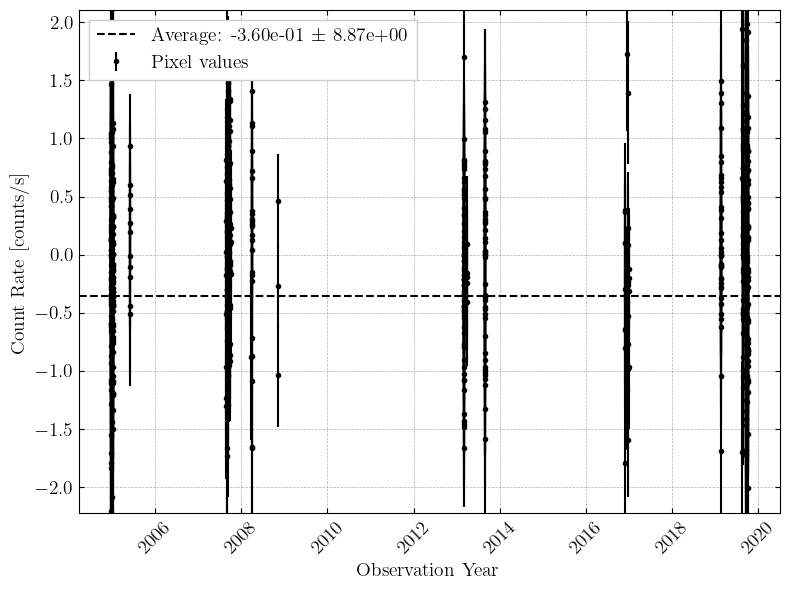

In [15]:
plot_countrate(img_times4, cr4, vr4)

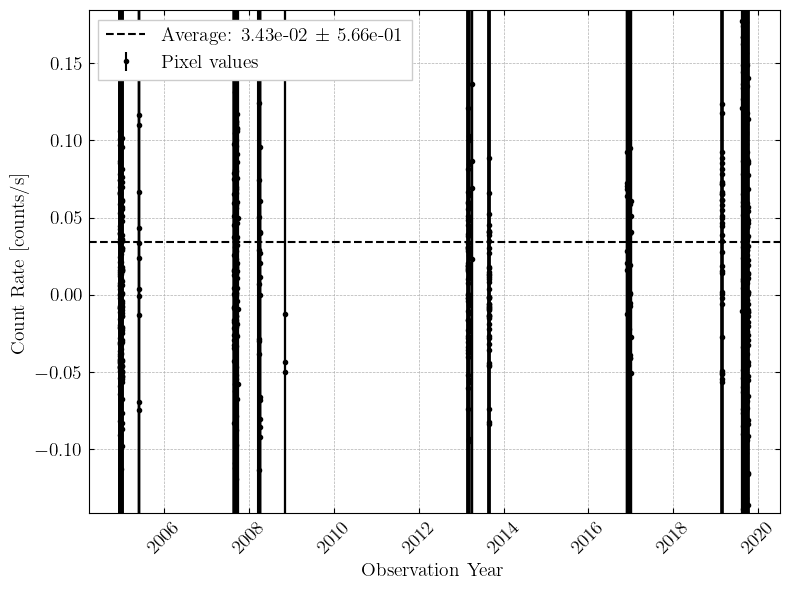

In [16]:
plot_countrate(img_times4, acr4, avr4)

Plot offset from pointing center

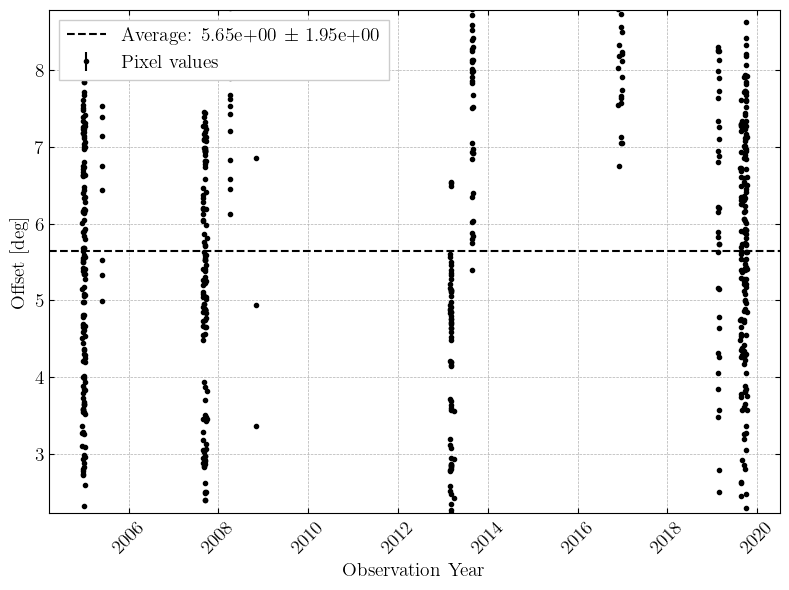

In [17]:
plot_offset(img_times4, offset4)

Signal to noise ratio

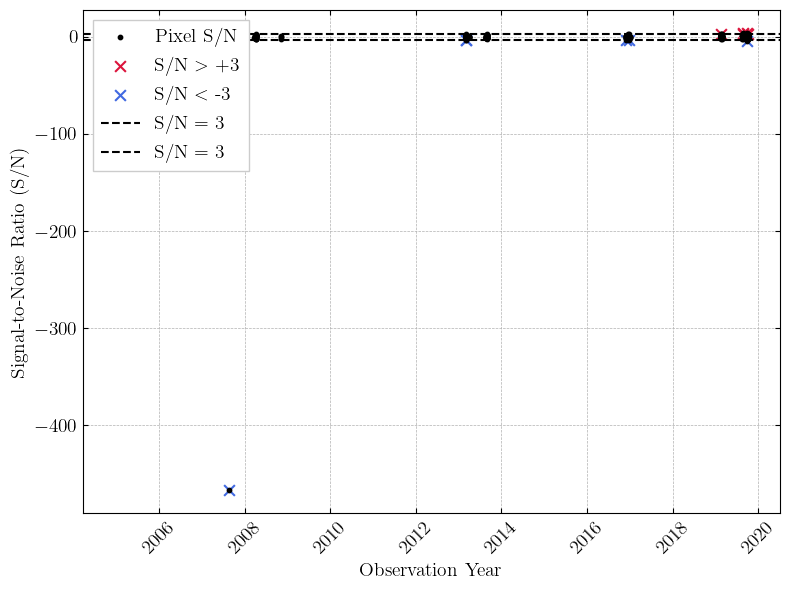

In [18]:
plot_snr(img_times4, cr4, vr4)

Normality p-value: 0.000e+00

Total observations: 676
Total points: 676
Observed points |S/N| > 3: 27
Expected points |S/N| > 3: 1.83
Observed fraction: 3.99%
Expected fraction: 0.27%
P-value (|S/N| > 3): 1.066e-22

Observed points S/N > 3: 25
Expected points S/N > 3: 0.91
Observed fraction (positive only): 3.70%
Expected fraction: 0.135%
P-value (S/N > 3): 1.735e-27


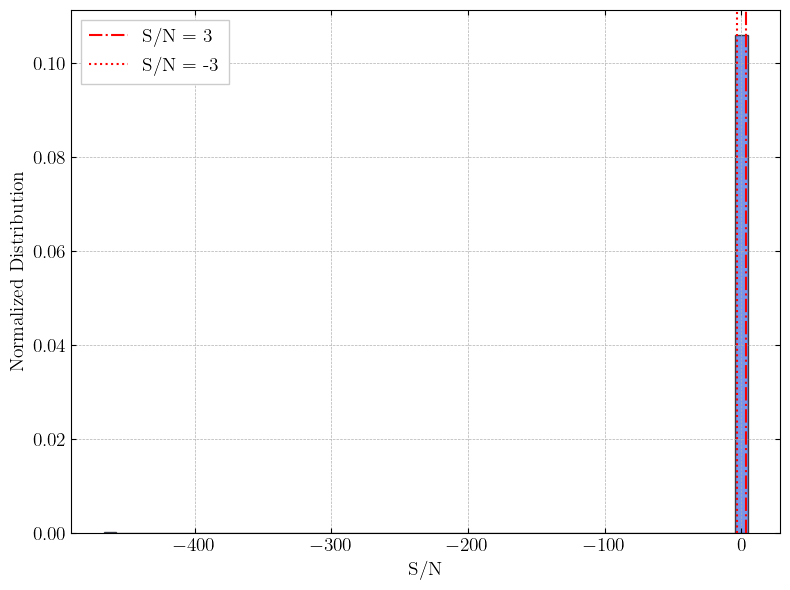

In [19]:
plot_snr_distribution(cr4, vr4, color='royalblue')

Fluxes

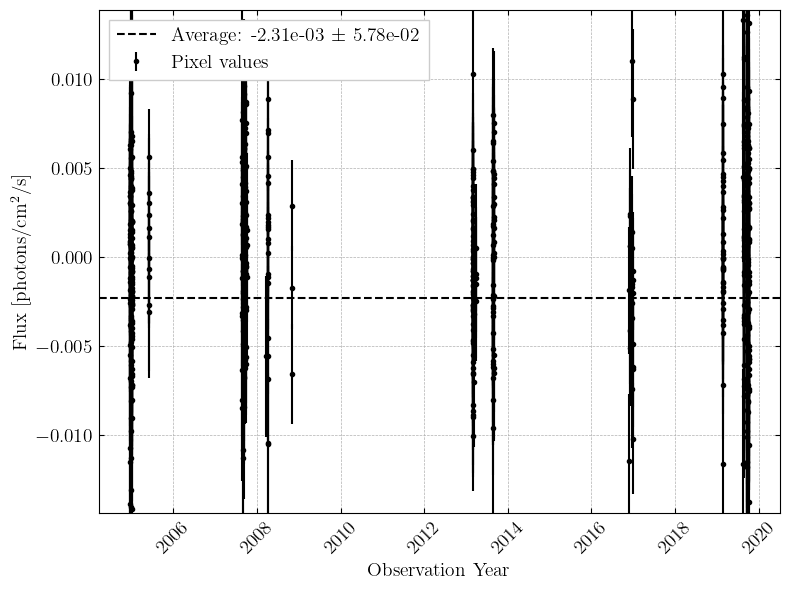

In [20]:
mask = crabENERGY == "60-100 keV"
crabYEAR_60_100 = crabYEAR[mask]
crabCR_60_100 = crabCR[mask]
crabERR_60_100 = crabERR[mask]

ph_flux4, ph_flux4_err, erg_flux4, erg_flux4_err, flux4_date, flux4_end = cr2flux(cr4, vr4, img_times4, end_times4, crabCR_60_100, crabERR_60_100, crabYEAR_60_100)

plot_flux(flux4_date, ph_flux4, ph_flux4_err**2)

In [21]:
ph_flux_weighted_avg, ph_flux_weighted_err = simple_weighted_average(ph_flux4, ph_flux4_err)
print(f"Weighted Photon Flux: {ph_flux_weighted_avg:.3e} ± {ph_flux_weighted_err:.3e}") 

Weighted Photon Flux: -3.181e-03 ± 1.448e-04


In [22]:
snr = cr4 / np.sqrt(vr4)
outliers_idx = [i for i, snr in enumerate(snr) if snr > 3]

print(f'Persistent upper limit: {ph_flux_weighted_err * 3 + ph_flux_weighted_avg:.3e}') # photons/cm2/s (3 * sigma weighted error + weighted average)
print(f'Average errorbar * 3: {ph_flux4_err.mean() * 3:.3e}') # photons/cm2/s (3 * sigma average error)
print(f'Max upper limit: {np.max([flux for i, flux in enumerate(ph_flux4) if i in outliers_idx]):.3e}') # photons/cm2/s (maximum flux value with S/N > 3)
print(f'Error on max upper limit: {np.max([flux for i, flux in enumerate(ph_flux4_err) if i in outliers_idx]):.3e}') # photons/cm2/s (error on maximum flux value with S/N > 3)

Persistent upper limit: -2.747e-03
Average errorbar * 3: 1.229e-02
Max upper limit: 2.136e-02
Error on max upper limit: 5.486e-03


In [25]:
gamma = 2.08  # photon index of ISGRI 
E0 = 1  # 100 keV reference energy
K = 10.3  # flux (photons/cm2/s/keV) @ 1 keV

energy_range = (60, 100)  # keV

E = np.linspace(energy_range[0], energy_range[1], 1000) 

power_law = K * (E / E0) ** (-gamma)  # flux
flux4 = np.trapz(power_law, E)  # integrate over the energy range
print(flux4)

0.04857379479242087


In [27]:
# print conversion factors over the years

print("Conversion factors for 60-100 keV ISGRI flux to photons/cm2/s:")

conv_factor = flux4 / crabCR_60_100
conv_factor_err =  conv_factor * (crabERR_60_100 / crabCR_60_100)

for year in np.unique(crabYEAR_60_100):
    idx = np.where(crabYEAR_60_100 == year)[0]
    if len(idx) > 0:
        print(f"{year}: {conv_factor[idx[0]]:.3e} ± {conv_factor_err[idx[0]]:.3e} (photons/cm2/s) / (counts/s)")
    else:
        print(f"{year}: No data available")

Conversion factors for 60-100 keV ISGRI flux to photons/cm2/s:
2003: 1.190e-03 ± 9.736e-06 (photons/cm2/s) / (counts/s)
2004: 1.199e-03 ± 1.167e-05 (photons/cm2/s) / (counts/s)
2005: 1.149e-03 ± 9.388e-06 (photons/cm2/s) / (counts/s)
2006: 1.288e-03 ± 1.476e-05 (photons/cm2/s) / (counts/s)
2007: 1.244e-03 ± 1.333e-05 (photons/cm2/s) / (counts/s)
2008: 1.206e-03 ± 1.294e-05 (photons/cm2/s) / (counts/s)
2009: 1.263e-03 ± 1.528e-05 (photons/cm2/s) / (counts/s)
2010: 1.261e-03 ± 1.109e-05 (photons/cm2/s) / (counts/s)
2011: 1.267e-03 ± 1.152e-05 (photons/cm2/s) / (counts/s)
2012: 1.245e-03 ± 1.148e-05 (photons/cm2/s) / (counts/s)
2013: 1.156e-03 ± 7.532e-06 (photons/cm2/s) / (counts/s)
2014: 1.167e-03 ± 9.147e-06 (photons/cm2/s) / (counts/s)
2015: 1.152e-03 ± 6.658e-06 (photons/cm2/s) / (counts/s)
2016: 1.218e-03 ± 7.567e-06 (photons/cm2/s) / (counts/s)
2017: 1.154e-03 ± 7.712e-06 (photons/cm2/s) / (counts/s)
2018: 1.191e-03 ± 8.288e-06 (photons/cm2/s) / (counts/s)
2019: 1.311e-03 ± 1.020e-

Monthly weighted average

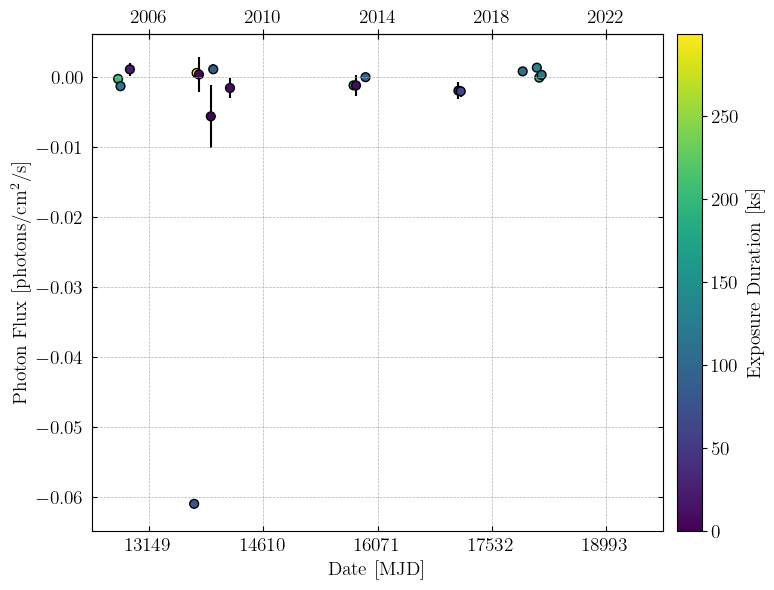

In [28]:
monthly_lightcurve4 = plot_monthly_flux_lc(ph_flux4, ph_flux4_err, erg_flux4, erg_flux4_err, flux4_date, flux4_end, plot=True, dual_plot='exposure', save=True, save_name='Jupiter-LC-60-100keV')

Comparison with background

Images corresponding to S/N > 3:


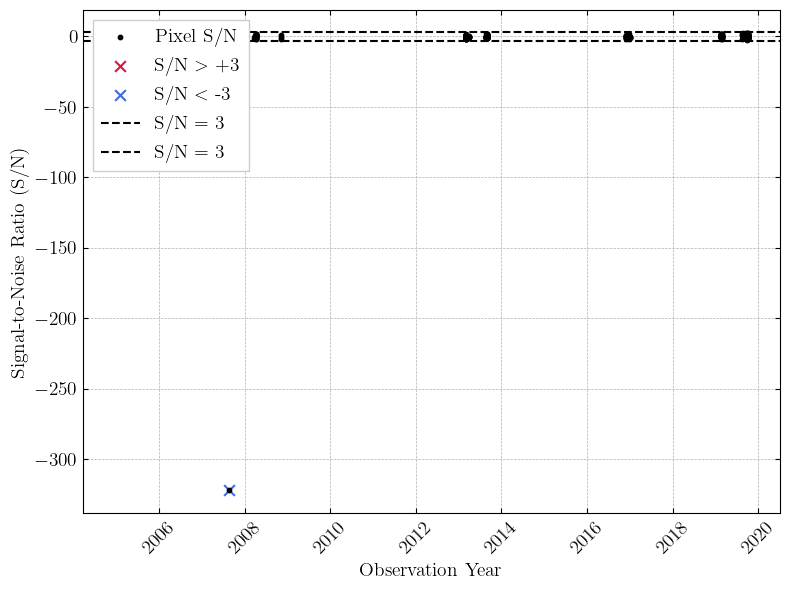

In [29]:
plot_bkgd_snr(img_times4, cr4, vr4, acr4, avr4)

Normality p-value: 0.000e+00

Total observations: 676
Total points: 676
Observed points |S/N| > 3: 1
Expected points |S/N| > 3: 1.83
Observed fraction: 0.15%
Expected fraction: 0.27%
P-value (|S/N| > 3): 2.943e-01

Observed points S/N > 3: 0
Expected points S/N > 3: 0.91
Observed fraction (positive only): 0.00%
Expected fraction: 0.135%
P-value (S/N > 3): 4.012e-01


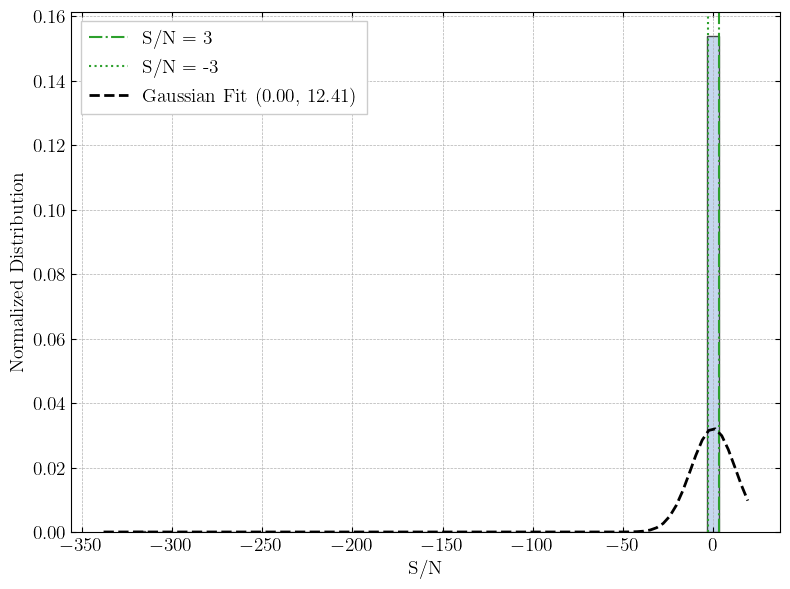

In [31]:
colors = plt.get_cmap('tab20').colors

plot_bkgd_snr_distribution(cr4, vr4, acr4, avr4, color=colors[1], linecolor=colors[4], fit=True, save=True, save_name='Jupiter-60-100-BSNR-distribution')

### Multi-panel plots (tests)

Exposure histogram + offsets + monthly fluxes for one energy band

In [ ]:
def plot_monthly_exposure_offset_lightcurve(
    img_times1, end_times1, offset1,
    monthly_lightcurve,
    fs=14
):
    """
    Plot a 3-panel figure:
    1) Exposure duration per month [ks]
    2) Average offset per month
    3) Monthly lightcurve with errors
    
    Parameters:
    - img_times1, end_times1: lists of datetime objects (start/end times per exposure)
    - offset1: list of offsets (same length as img_times1)
    - monthly_lightcurve: tuple/list of (unique_dates, ph_flux, erg_flux, ph_flux_err, erg_flux_err)
                         unique_dates as datetime or ISO strings
    - fs: font size for labels and ticks
    """
    unique_dates, ph_flux, erg_flux, ph_flux_err, erg_flux_err = monthly_lightcurve

    # DataFrame for exposures
    df_exp = pd.DataFrame({
        'start': img_times1,
        'end': end_times1,
        'offset': offset1
    })

    # Calculate duration in ks
    df_exp['duration_ks'] = (df_exp['end'] - df_exp['start']).dt.total_seconds() / 1000

    # Convert to monthly periods for grouping
    df_exp['month'] = df_exp['start'].dt.to_period('M')

    # Sum durations and average offset by month
    exp_monthly = df_exp.groupby('month')['duration_ks'].sum()
    offset_monthly = df_exp.groupby('month')['offset'].mean()

    # Convert unique_dates to pandas Period for alignment (assuming datetime or ISO strings)
    lc_months = pd.to_datetime(unique_dates).to_period('M')

    # Create figure and axes
    fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharex=True)

    # --- Panel 1: Exposure duration ---
    axes[0].bar(
        exp_monthly.index.to_timestamp(),
        exp_monthly.values,
        width=20,
        color='seagreen',
        alpha=0.6,
        edgecolor='black'
    )
    axes[0].set_ylabel(r'Exposure Duration [ks]', fontsize=fs)
    axes[0].tick_params(axis='both', which='both', labelsize=fs, direction='in')
    axes[0].yaxis.set_ticks_position('both')
    axes[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

    # --- Panel 2: Average offset ---
    axes[1].plot(
        offset_monthly.index.to_timestamp(),
        offset_monthly.values,
        marker='o', linestyle=None,
        color='royalblue',
        alpha=0.8,
        label=r'Average Offset'
    )
    axes[1].set_ylabel(r'Offset [$^\circ$]', fontsize=fs)
    axes[1].tick_params(axis='both', which='both', labelsize=fs, direction='in')
    axes[1].yaxis.set_ticks_position('both')
    axes[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    axes[1].legend(fontsize=fs)

    # --- Panel 3: Monthly lightcurve ---
    axes[2].errorbar(
        pd.to_datetime(unique_dates),
        ph_flux,
        yerr=ph_flux_err,
        fmt='o-',
        color='indianred',
        ecolor='indianred',
        alpha=0.8,
        capsize=3,
        label=r'Photon Flux'
    )
    axes[2].set_ylabel(r'Photon Flux $\mathrm{[ph/cm^2/s]}$', fontsize=fs)
    axes[2].set_xlabel(r'Date [YYYY]', fontsize=fs)
    axes[2].tick_params(axis='both', which='both', labelsize=fs, direction='in')
    axes[2].xaxis.set_major_locator(mdates.YearLocator())
    axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    axes[2].xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[1,4,7,10]))
    axes[2].xaxis.set_ticks_position('both')
    axes[2].yaxis.set_ticks_position('both')
    axes[2].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    axes[2].legend(fontsize=fs)

    # Rotate and format x-axis date labels nicely
    plt.setp(axes[2].xaxis.get_majorticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

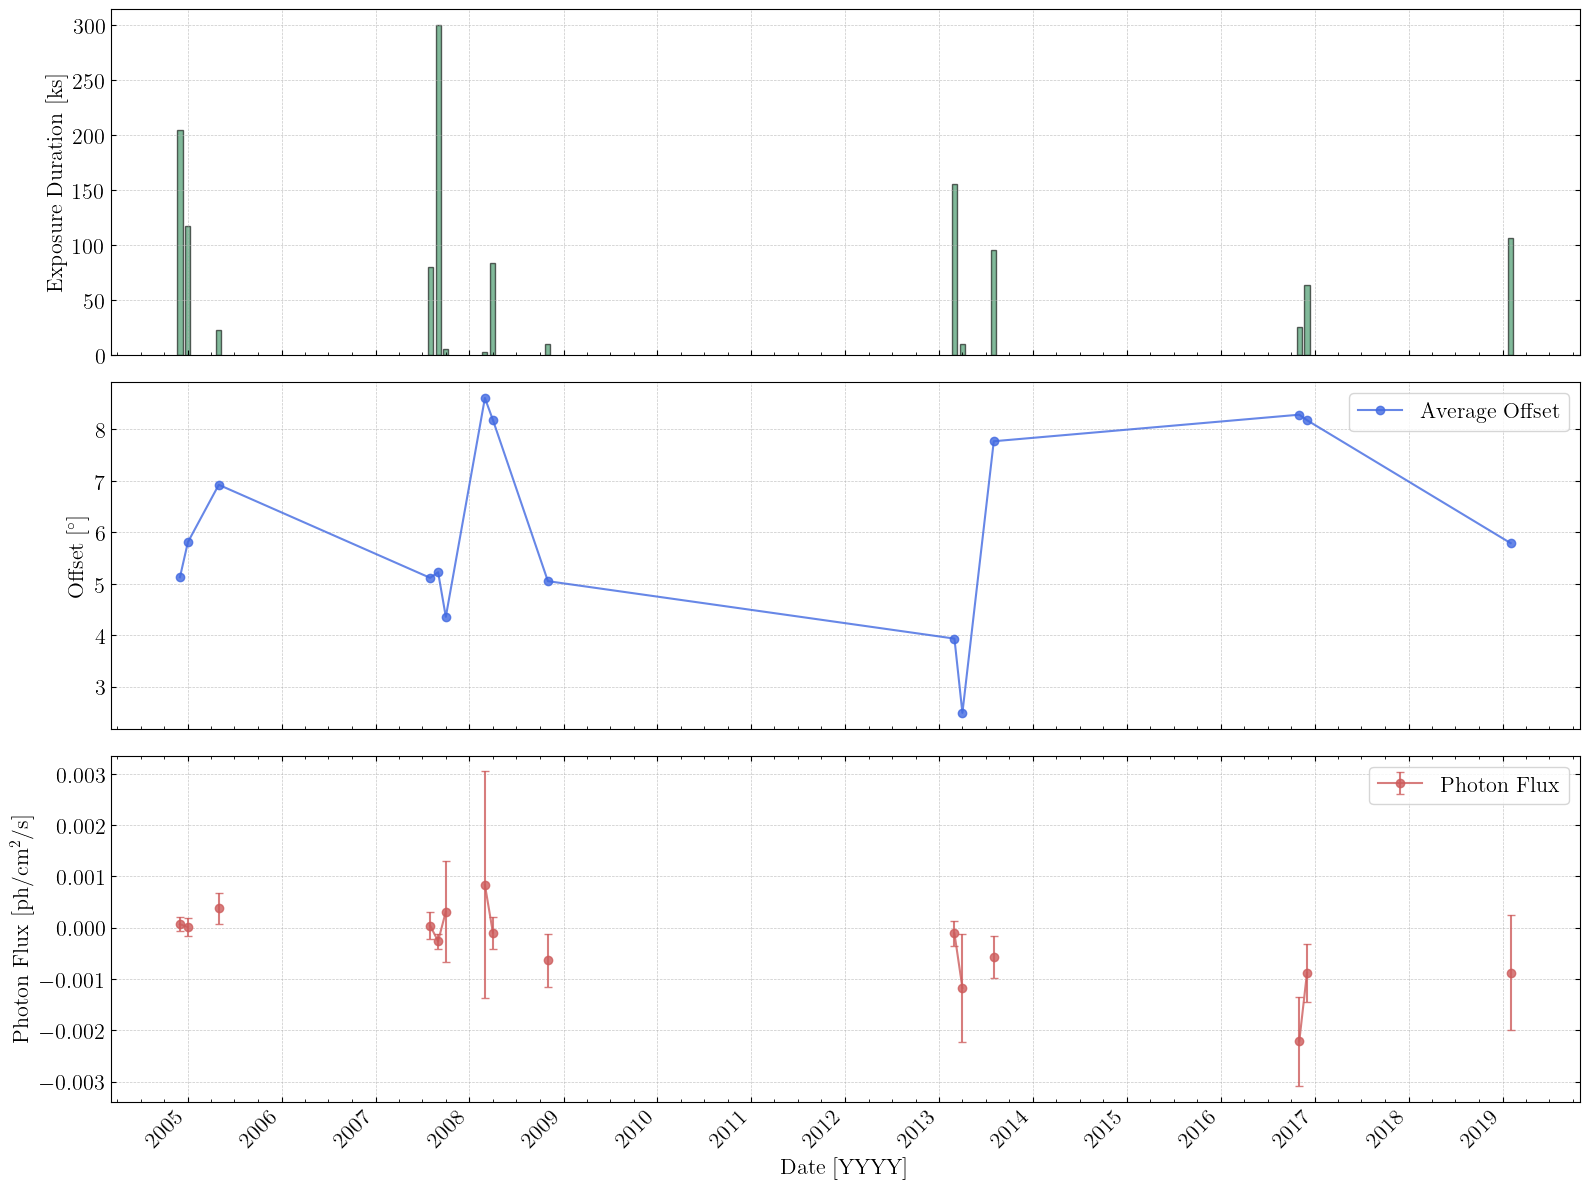

In [ ]:
plot_monthly_exposure_offset_lightcurve(img_times1, end_times1, offset1, monthly_lightcurve1, fs=16)

All energy ranges in one plot

In [ ]:
def plot_monthly_exposure_offset_lightcurve_multi(
    img_times1, end_times1, offset1, monthly_lightcurve1,
    img_times2, end_times2, offset2, monthly_lightcurve2,
    img_times3, end_times3, offset3, monthly_lightcurve3,
    fs=14
):
    def make_df(img_times, end_times, offsets):
        df = pd.DataFrame({
            'start': img_times,
            'end': end_times,
            'offset': offsets
        })
        df['duration_ks'] = (df['end'] - df['start']).dt.total_seconds() / 1000
        df['month'] = df['start'].dt.to_period('M')
        return df.groupby('month').agg({'duration_ks': 'sum', 'offset': 'mean'})

    df1 = make_df(img_times1, end_times1, offset1)
    df2 = make_df(img_times2, end_times2, offset2)
    df3 = make_df(img_times3, end_times3, offset3)

    all_months = sorted(set(df1.index).union(df2.index).union(df3.index))
    df1 = df1.reindex(all_months, fill_value=0)
    df2 = df2.reindex(all_months, fill_value=0)
    df3 = df3.reindex(all_months, fill_value=0)

    # Unpack lightcurve data
    unique_dates1, ph_flux1, erg_flux1, ph_flux_err1, erg_flux_err1 = monthly_lightcurve1
    unique_dates2, ph_flux2, erg_flux2, ph_flux_err2, erg_flux_err2 = monthly_lightcurve2
    unique_dates3, ph_flux3, erg_flux3, ph_flux_err3, erg_flux_err3 = monthly_lightcurve3

    unique_dates1_dt = pd.to_datetime(unique_dates1)
    unique_dates2_dt = pd.to_datetime(unique_dates2)
    unique_dates3_dt = pd.to_datetime(unique_dates3)

    fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

    width = 20  # bar width in days approx

    # Panel 1: Stacked exposure durations
    axes[0].bar(df1.index.to_timestamp(), df1['duration_ks'], width=width, color='seagreen', alpha=0.7, label='3 - 15 keV', edgecolor='black')
    axes[0].bar(df2.index.to_timestamp(), df2['duration_ks'], width=width, bottom=df1['duration_ks'], color='royalblue', alpha=0.7, label='15 - 30 keV', edgecolor='black')
    bottom_23 = df1['duration_ks'] + df2['duration_ks']
    axes[0].bar(df3.index.to_timestamp(), df3['duration_ks'], width=width, bottom=bottom_23, color='indianred', alpha=0.7, label='30 - 60 keV', edgecolor='black')

    axes[0].set_ylabel(r'Exposure Duration [ks]', fontsize=fs)
    axes[0].tick_params(axis='both', which='both', labelsize=fs, direction='in')
    axes[0].yaxis.set_ticks_position('both')
    axes[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    axes[0].legend(fontsize=fs)

    # Panel 2: Average offset per month
    axes[1].plot(df1.index.to_timestamp(), df1['offset'], marker='o', linestyle=None, color='seagreen', label='3 - 15 keV')
    axes[1].plot(df2.index.to_timestamp(), df2['offset'], marker='o', linestyle=None, color='royalblue', label='15 - 30 keV')
    axes[1].plot(df3.index.to_timestamp(), df3['offset'], marker='o', linestyle=None, color='indianred', label='30 - 60 keV')

    axes[1].set_ylabel(r'Average Offset [units]', fontsize=fs)
    axes[1].tick_params(axis='both', which='both', labelsize=fs, direction='in')
    axes[1].yaxis.set_ticks_position('both')
    axes[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    axes[1].legend(fontsize=fs)

    # Panel 3: Three monthly lightcurves
    axes[2].errorbar(unique_dates1_dt, ph_flux1, yerr=ph_flux_err1, fmt='o-', color='seagreen', ecolor='seagreen', alpha=0.8, capsize=3, label='3 - 15 keV')
    axes[2].errorbar(unique_dates2_dt, ph_flux2, yerr=ph_flux_err2, fmt='o-', color='royalblue', ecolor='royalblue', alpha=0.8, capsize=3, label='15 - 30 keV')
    axes[2].errorbar(unique_dates3_dt, ph_flux3, yerr=ph_flux_err3, fmt='o-', color='indianred', ecolor='indianred', alpha=0.8, capsize=3, label='30 - 60 keV')

    axes[2].set_ylabel(r'Photon Flux', fontsize=fs)
    axes[2].set_xlabel(r'Date [YYYY-MM]', fontsize=fs)
    axes[2].tick_params(axis='both', which='both', labelsize=fs, direction='in')
    axes[2].xaxis.set_major_locator(mdates.YearLocator())
    axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    axes[2].xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[1,4,7,10]))
    axes[2].xaxis.set_ticks_position('both')
    axes[2].yaxis.set_ticks_position('both')
    axes[2].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    axes[2].legend(fontsize=fs)

    plt.setp(axes[2].xaxis.get_majorticklabels(), rotation=45, ha='right')

    plt.tight_layout()

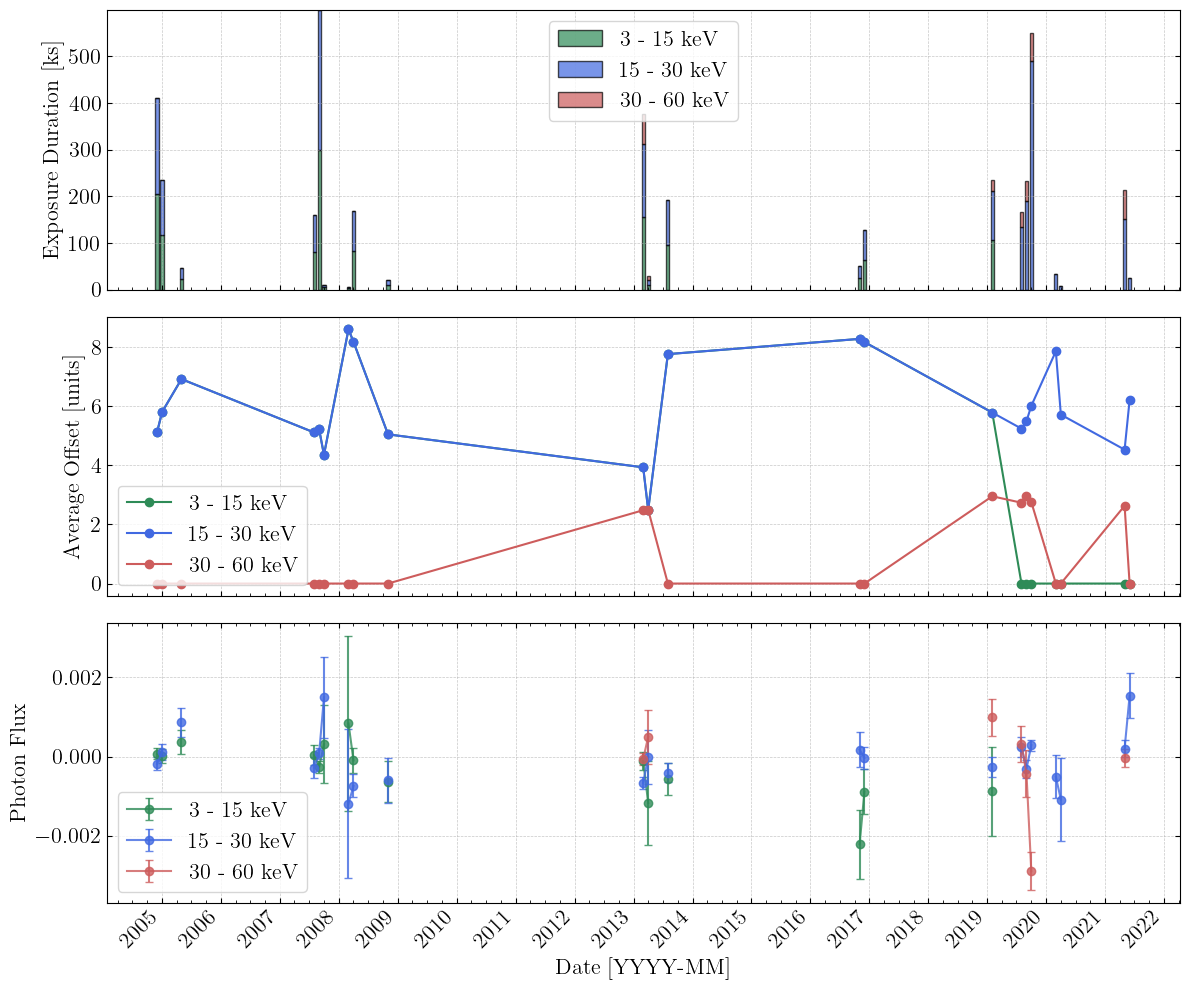

In [ ]:
plot_monthly_exposure_offset_lightcurve_multi(
    img_times1, end_times1, offset1, monthly_lightcurve1,
    img_times2, end_times2, offset2, monthly_lightcurve2,
    img_times3, end_times3, offset3, monthly_lightcurve3,
    fs=16
)